# PHAS0029 Final Assignment: The Infinite "Unsquare" Potential

### _Student Number: 19014831_

## Introduction

In this notebook, I will use various numerical tools to produce a numerical method which will solve for the wavefunction and energy solutions to a particular quantum system. Firstly, one of the numerical tools which will be used is the **Runge-Kutta** method to solve the Time Independent Schrodinger equation, a second-order differential equation that specifies a particular quantum system. I will also use the **secant method** to converge to the correct energy eigenvalues for a given state, $n$, which will be inputted into the Runge-Kutta function to produce wavefunction solutions. Finally, I will also make use of the **finite difference method** to obtain numerical values for the energy guesses needed in the secant method to converge to the correct energy for a given quantum state- this will be especially useful to motivate meaningful energy guesses for quantum systems which have no analytical solution to motivate the energy guesses.

For all of the quantum systems considered in this notebook, they will all be within an infinite square well potential; I will begin by solving for the many energy states of a particle in a pure infinite square well before extending this to incorporate different embedded potentials within the base of the infinite square well. I will also use qualitative analysis to compare my numerical solutions to the known solutions (if there is one) for a given quantum state. I will also conduct quantitative analysis to compare my numerical solutions to the analytical solutions for a given quantum system where possible.

## Finding the ground state energy (Section 3.1)

In the first section, the focus will be to set up an infinite square well quantum system and calculate the ground state energy of an electron that is confined within this square well. Equation 1 shows the potential function which describes this system.

$$ V(x) = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} \tag{1}
$$

The Time-Independent Schrodinger Equation (2) will be used to find the wavefunction for this particle- the wavefunction contains all of the information regarding the particle, such as its energy.

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)\tag{2}
$$

Numerical methods can be used to solve this equation; firstly, the 2nd order differential equation is split into 2 first order equations shown below:

$$\frac{d \psi}{dx } = \phi \tag{3}$$


$$\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x) \tag{4}
$$

The boundary conditions for this problem are clear from equation 1; the wavefunction can only take values as specified by equation 5.

$$ \psi = \begin{cases} \text{Non-zero} & \text{if } -a < x < +a, \\ 
0  & \text{if } |x| \geq a, \end{cases} \tag{5}
$$

In order to find the ground state energy of an electron in this system, I will iterate from $-a$ (where $\psi(-a)$ is set to $0$) to $a$ using the secant method by which two initial guesses are made for the energy and the corresponding wavefunction arrays will be calculated using the Runge Kutta function which will incorporate equations (3) and (4). If the final element of the wavefunction arrays equal 0, this shows that the energy satisfies the boundary conditions of the infinite square well, i.e. $\psi(x=a) = 0$.

Finally, to check I have converged on the ground state energy and not a higher-order state, I will make a comparison between my numerical solution and the analytical solution for the energy of a particle in an infinite square well given by equation 6- where, in this case, $n=1$ for the ground state energy.

$$
E = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}\tag{6}
$$

(Dash, 2021a)

**Equations have been taken from (Dash, 2020)**

I begin by importing the relevant Python modules needed to complete this task below.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Furthermore, I will define the constants to be used as a global variable below- this will mean that I do not need to keep defining them within functions.

In [2]:
## Constants to be used in the notebook:

m= 9.109383702e-31 # Assigning the value for the electron mass, m(kg).
h= 1.054571817e-34 # Assigning the value for ℏ, I have written "hbar" as h (Js) here for ease.
e= 1.602176634e-19 # Assigning the value for the electron charge, e(C)

Furthermore, I will define the potential function that will give me the potential at each respective x point for an infinite square well. In this scenario, the particle will never be outside the well, where $V(x)= \infty$, and as $V(x)= 0$ inside the well; therefore, I can ignore this in these calculations. This function will simply return a value of $V(x) = 0$ for all values of position $x$ as required by equation (1).

In [3]:
# Coding a function for the purposes of an infinite square well which will return a value of 0 at each position x.
def infpotential(x): 
    '''
    This function will take in values of x and output a potential value of 0 for every x point.
    Inputs: 
        x- position of the particle.
    Output: 
        V- the potential energy value for a given x. Here V=0.0 for all x.
    '''
    return 0.0

Moreover, I also define a function below to find the solution to the RHS of the two first-order differential equations defined above. The inputs `potential` and `E` must be included here as they will vary later on; therefore, it is helpful to define a generalised function that can be used in many different scenarios.

In [4]:
# Defining a function which will be used in the Runge-Kutta function to solve the two first-order 
# differential equations defined above from an input of r (vector containing the wavefunction, ψ, 
# and the derivative of ψ with respect to time, ϕ), x (position), potential (the potential function we are 
# interested in) and E (energy, J).
def schrodinger(r,x,potential, E): 
    '''
    This function will be used in the Runge-Kutta function below to solve the Time Independent Schrodinger 
    Equation. This function will output an array of vectors for the first derivative of psi and phi respectively
    as defined in equations (3) and (4).
    Inputs: 
        r- vector containing ψ (r[0]) and ϕ (r[1]).
        x- position.
        potential- function defining the potential at a given x.
        E- energy.
    Outputs: 
        [f_psi, f_phi] numpy arrays containing the first derivative of psi and phi respectively.
    '''
    
    psi= r[0] # First element of the r vector denotes the wavefunction, psi.
    phi= r[1] # The second element of the r vector denotes the first derivative of the wavefunction, phi.
    f_psi= phi # Differentiating psi with respect to time.
    f_phi= (2*m/(h**2))*(potential(x)-E)*psi # Differentiating phi with respect to time.
    return np.array([f_psi,f_phi])# Converting the functions defined above into array form. 

It is also worth noting that in the input vector `r`, while the initial value of the wavefunction, $\psi$ will be set depending on the quantum system in consideration- i.e. for the ground state energy we know from theoretical quantum mechanics that $\psi(x=-a)=0$ therefore, our initial input for $\psi$ will be 0 in this case. However, the value of $\phi$ can be arbitrarily set as the only effect of $\phi$'s initial condition is to scale the wavefunction by a constant- this effect can be corrected by normalising the wavefunction, which is done in **Section 3.2**.

Furthermore, I also define the Runge-Kutta function below, which will play a key role in solving this problem numerically. Again, I have introduced a dependency on the variables `potential` and `E` to generalise my Runge-Kutta function so that these values can be inputted and used in the `schrodinger` function contained within the `RungeKutta` function to produce the array of wavefunction values.

In [5]:
## Code adapted from my submission to my Session 7 task (19014831, 2021a) and originally from (Dash, 2021b).
def RungeKutta(r,xvalues,function, potential, E):
    '''
    Fourth-order Runge-Kutta re-written for two or more simultaneous equations.
    Inputs: 
        r: array of values, one for each equation in the system.
        xpoints: array of position values.
        function: the function to use to solve the system.
        potential: the function describing the potential energy of the system.
        E: the energy of the particle.
    Outputs: 
        [x_array, y_array] numpy arrays of length N+1 containing psi and phi respectively.
    '''
    # Initialising empty arrays.
    x_array = []
    for x in xvalues:
        x_array.append(r[0]) # Adds each iterative result of x_array to the array defined above.
        k1 = step*function(r,x,potential,E) 
        k2 = step*function(r+0.5*k1, x+0.5*step,potential,E) 
        k3 = step*function(r+0.5*k2, x+0.5*step,potential,E) 
        k4 = step*function(r+k3, x+step,potential,E) 
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # The following lines incorporate the values of x and y at final xpoint boundary (a) defined above.
    x_array.append(r[0])
    return np.array(x_array) # Converts output to numpy array with 1 row and N+1 columns.

In the above code cell, there is only an `x_array` which gives the array of values for $\psi(x)$ which is the only thing we need- another array of  $\phi(x)$ values could also be generated, however, they are of no use hereafter; therefore, they are omitted from the above function.

In the following code cell, I will set up the Runge-Kutta function conditions and make the initial guesses for the energy. Furthermore, these energy guesses will be used in an iteration of the secant method will be used to converge to the correct particle energy, which produces a wavefunction (using the `RungeKutta`) value of 0 at the position $a$, therefore, satisfies the boundary conditions of the problem. Finally, I will compare my numerical solution for the ground state energy with the analytical solution to the ground state energy from equation (6) and setting $n$ equal to 1.

In [6]:
## Conditions for the Runge-Kutta Function 
a= 5e-11# Assigning the value for the half-width of the potential well (m).
N=1000 # This is the number of Runge-Kutta calculation points.
step= (2*a)/N # This will be the step size used in the Runge-Kutta function.
xpoints = np.arange(-a, a, step) # This array of xpoints will be used in the Runge-Kutta function to determine the solution to the differential equations.

## Initial Conditions
E1= 6e-18 # Initial guess 1 for the Energy of the wavefunction.
E2= 7e-18 # Initial guess 2 for the Energy of the wavefunction.
wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,infpotential, E1)[N] # Using my initial 
wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,infpotential, E2)[N] # guesses for energy 
                                                                                     # to create 2 wavefunctions.
## Secant method iteration
tolerance = e/1e10 # Setting the tolerance for convergence
while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
    E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
    # Updating the initial energies for the next iteration.
    E1 = E2 
    E2 = E3 
    # Re-calculating the wavefunctions for these new energies.
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,infpotential, E1)[N]
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, infpotential, E2)[N]
# Converting the energy (J) into eV:
E_final= E3/e    
print("Numerical solution for the energy needed,   E=", E_final, "eV")
# Actual value of the ground state energy for an infinite square well.
E_real= ((np.pi**2*h**2)/(2*m*(2*a)**2))/e
print("Analytical solution for the energy needed,  E=", E_real, "eV")
# Actual difference between the numerical solution and the analytical solution
E_error= abs(E_real-E_final)
print(f"Error between the numerical solution compared to the analytical solution for E is {E_error: 0.12f} eV" )   
# Percentage difference in the numerical solution and the analytical solution
E_perror=(E_error/E_real)*100
print(f"Percentage error between the numerical solution compared to the analytical solution for E is {E_perror: 0.10f}%")

Numerical solution for the energy needed,   E= 37.60301621359064 eV
Analytical solution for the energy needed,  E= 37.6030162135296 eV
Error between the numerical solution compared to the analytical solution for E is  0.000000000061 eV
Percentage error between the numerical solution compared to the analytical solution for E is  0.0000000002%


From above, we can see that the analytical solution to the infinite square well problem yields an accurate solution for the ground state energy as the percentage difference between the numerical solution and the analytical solution is $0.0000000002$% which shows practically no difference up to 10 decimal places. In conclusion, the numerical method yields accurate results, which can be verified using the theoretical equations.

## Finding the ground state wavefunction (Section 3.2)

As stated in **Section 3.1** above, the wavefunction calculated using the defined functions is scaled depending on the initial chosen value of $\phi$. Therefore, the wavefunction must be normalised before it is plotted. Normalisation is achieved using the following formula:

$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1\tag{7}
$$

A normalised wavefunction will be achieved by calculating the value of the integral on the LHS of (7) and dividing the wavefunction by the square root of this value. 

In Python, integrals can be performed using the trapezium rule for integration, illustrated in equation (8). Therefore, in the following code cell, I will code a Python function that will perform the integration using this method and then normalise my wavefunction as described above.

$$
I(a,b) = s \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + ks) \right]\tag{8}
$$

Where $s=\frac{a-b}{N}$ is the width of each trapezium that is integrated over; $a$ is the start point, $b$ is the endpoint, $N$ is the number of trapezium strips used.

**Equations have been taken from (Dash 2020)**

In [7]:
def integration(f_array,s):
    '''
    This function will integrate an inputted array of function values (output values of the function at given input points) 
    between the starting value and the last value using the trapezium rule; the inputted value of 's' will define 
    the width of trapezium strips which will be summed to give the integral. The lower the value of 's', 
    the higher the number of trapeziums summed over and the more accurate the integral will be- however, it will 
    take more computational power to integrate.
    Inputs:
        - f_array: the array of output values of the function of interest at given input points.
        - s: the width of each of the trapeziums which are summed to give the integral. 
    Outputs: 
        - I: the integral of the inputted function defined for the range in which the function's values have been defined.
    '''
    I = s*(0.5*f_array[0]+0.5*f_array[-1]+ np.sum(f_array[1:-1]))
    return I

<IPython.core.display.Javascript object>


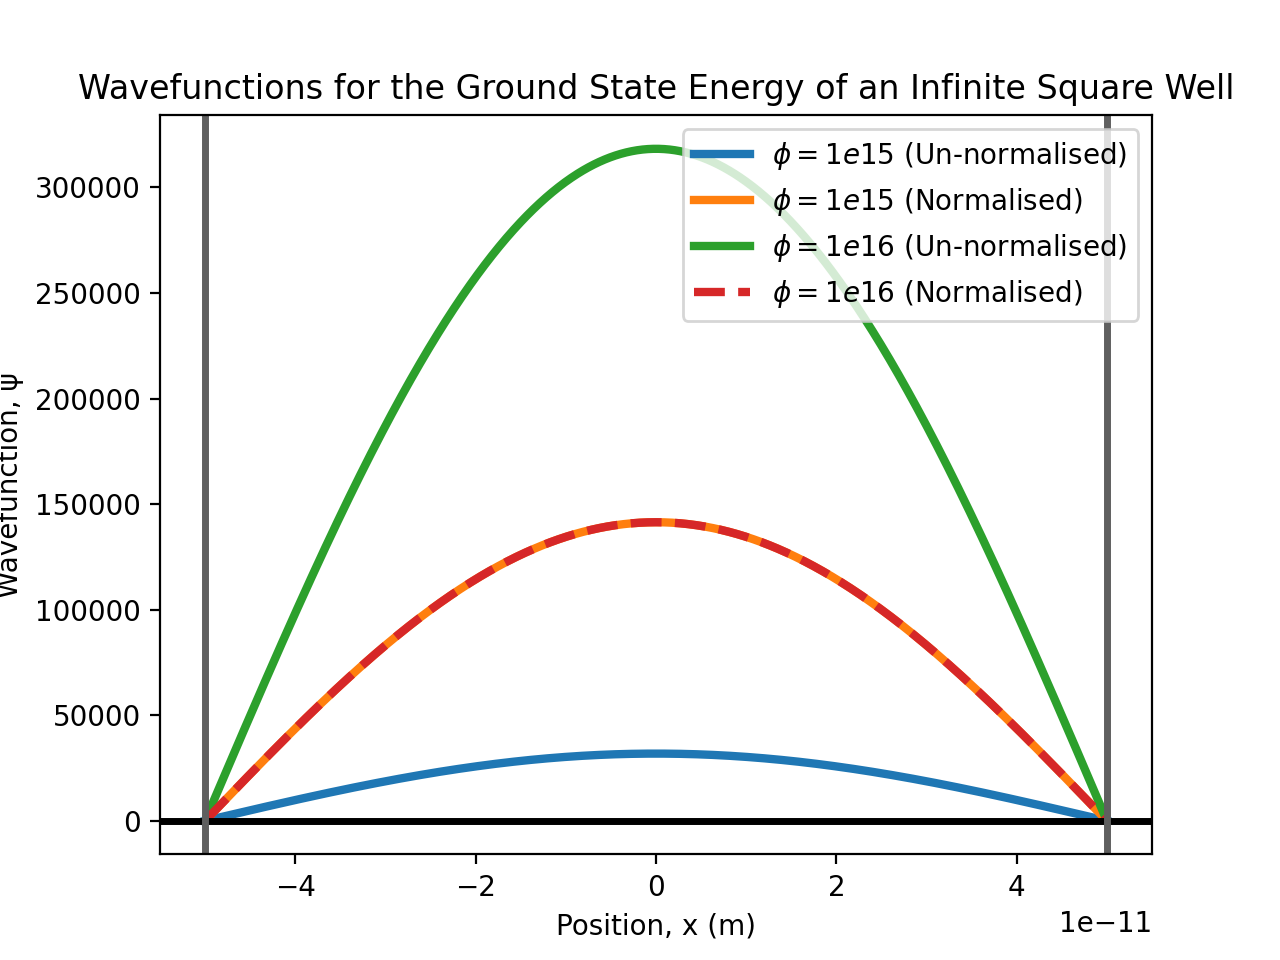

In [8]:
xplotpoints = np.arange(-a, a+step, step) # An array with same properties as xpoints but also includes end point of a.

# Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.

## Please note: to illustrate the fact that phi scales the wavefunction I have generated 2 versions below, I will discuss this further 
## in the following text cell.
unnorm_wvfunc1 = RungeKutta(np.array([0, 1e15]),xpoints,schrodinger, infpotential, E3) # Version 1, where phi=1e15.
unnorm_wvfunc1_v2 = RungeKutta(np.array([0, 1e16]),xpoints,schrodinger, infpotential, E3) # Version 2, where phi=1e16.

# Calculating the normalised wavefunctions by dividing the un-normalised wavefunctions by the integral of the square modulus 
# of the wavefunction as calculated using the integration function.
norm_wvfunc1= unnorm_wvfunc1/np.sqrt(integration((abs(unnorm_wvfunc1))**2 ,step))
norm_wvfunc1_v2= unnorm_wvfunc1_v2/np.sqrt(integration((abs(unnorm_wvfunc1_v2))**2 ,step))
# Producing the plot for the normalised wavefunction
plt.figure()
plt.plot(xplotpoints,unnorm_wvfunc1, linewidth=3, label="$\phi = 1e15$ (Un-normalised)")
plt.plot(xplotpoints,norm_wvfunc1,linewidth=3,label="$\phi = 1e15$ (Normalised)")
plt.plot(xplotpoints,unnorm_wvfunc1_v2, linewidth=3,label="$\phi = 1e16$ (Un-normalised)")
plt.plot(xplotpoints,norm_wvfunc1_v2, '--',linewidth=3,label="$\phi = 1e16$ (Normalised)")
plt.legend(loc="best")
plt.axhline(c="k",ls="-", lw=2.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
plt.xlabel("Position, x (m)")
plt.ylabel("Wavefunction, ψ")
plt.title("Wavefunctions for the Ground State Energy of an Infinite Square Well");

In the plot above, I have plotted the calculated wavefunctions using the `RungeKutta` function for the ground state energy, `E3`, as calculated in the previous section using the secant method. I have also plotted the normalised and unnormalised wavefunctions for two different initial values of $\phi$. As stated in **Section 3.1**, the initial value of $\phi$ scales the wavefunction, which can be seen in the above plot as the wavefunction for an initial value of $\phi=1e16\space m s^{-1}$ is situated above the wavefunction for which $\phi=1e15\space m s^{-1}$; however, when these two wavefunctions are normalised, their normalised versions are the same and overlap- I have purposely plotted both normalised versions of the respective unnormalised wavefunctions to illustrate this. This proves that the effect of the magnitude of $\phi$ is only to scale the wavefunction and that it can be arbitrarily set as the normalised wavefunction will be the same for a given energy state regardless of the initial size of the value of $\phi$ used. 

I have plotted the normalised wavefunction for the ground state energy on its own in the plot below.

<IPython.core.display.Javascript object>


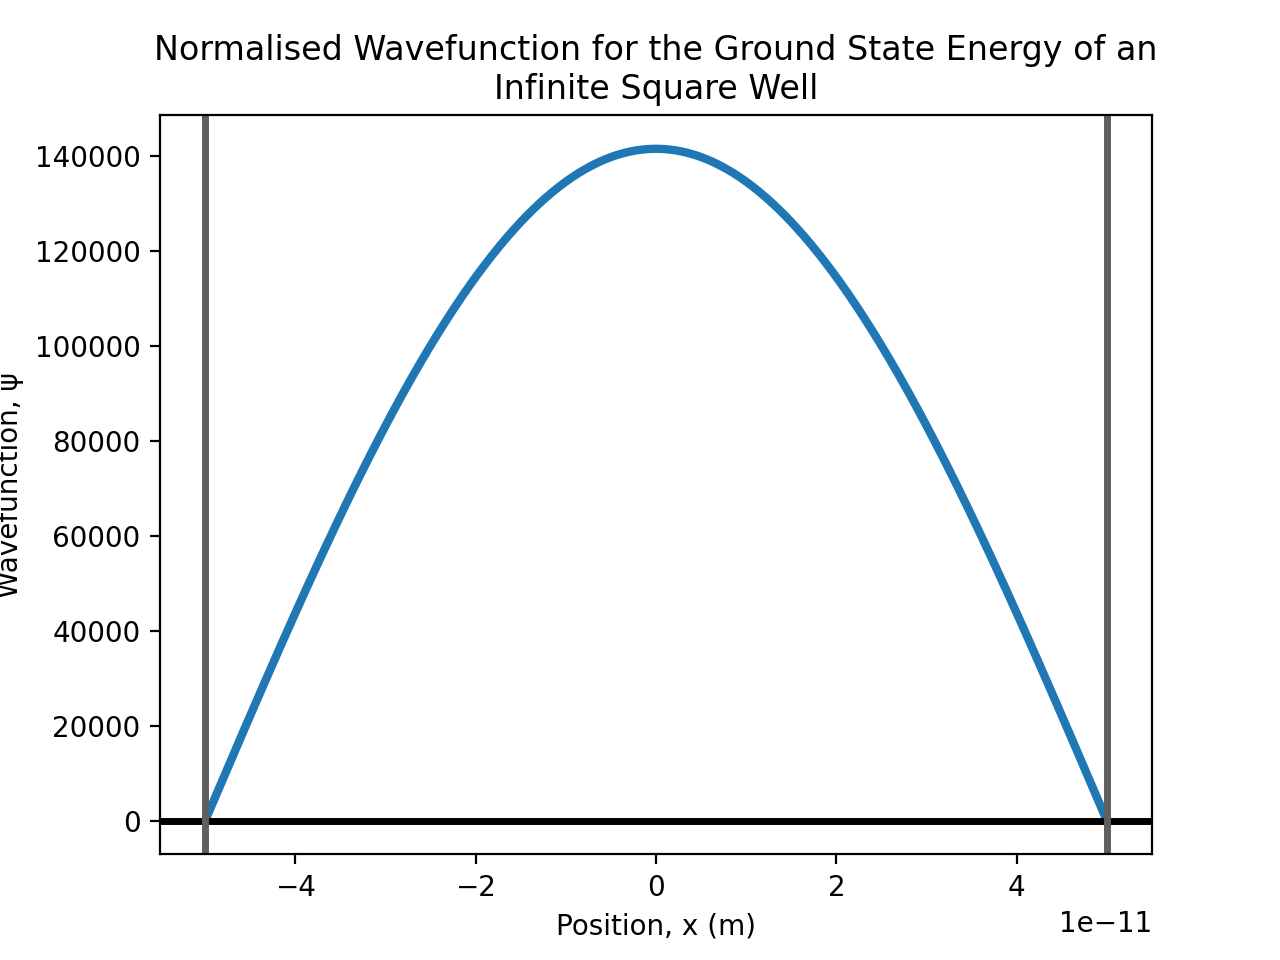

In [9]:
plt.figure()
plt.plot(xplotpoints,norm_wvfunc1,linewidth=3)
plt.axhline(c="k",ls="-", lw=2.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
plt.xlabel("Position, x (m)")
plt.ylabel("Wavefunction, ψ")
plt.title("Normalised Wavefunction for the Ground State Energy of an\nInfinite Square Well");

Next, I will define a function that will analytically calculate the wavefunction over a given range of $x$ values and for a given energy state, $n$. The function will be using equations (9) and (10) displayed below to calculate the appropriate wavefunction.

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}\tag{9}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even} \tag{10}
$$

**Equations have been taken from (Dash, 2020)**

In [10]:
def infpotwavefunc(x,a,n):
    '''
    This function will calculate the analytical solution for the wavefunction of a particle in an infinite
    square well at a given energy state, n, and for a given half-width of the whole region in consideration, a.
    Inputs: 
        x: the x values over which the wavefunction will be defined.
        a: the half-width of the full region in which the wavefunction is defined.
        n: energy level of the wavefunction in consideration.
    Outputs:
        wavefunc_n: the wavefunction for a given energy state, n.
    '''
    if (-1)**(n)<0: # This will be used to define the wavefunction for odd values of n.
        wavefunc_n=(1/np.sqrt(a))*np.cos((n*np.pi*x)/(2*a))
    else: # This will be the formula for the remaining values of n (even values):
        wavefunc_n=(1/np.sqrt(a))*np.sin((n*np.pi*x)/(2*a))
    return wavefunc_n

<IPython.core.display.Javascript object>


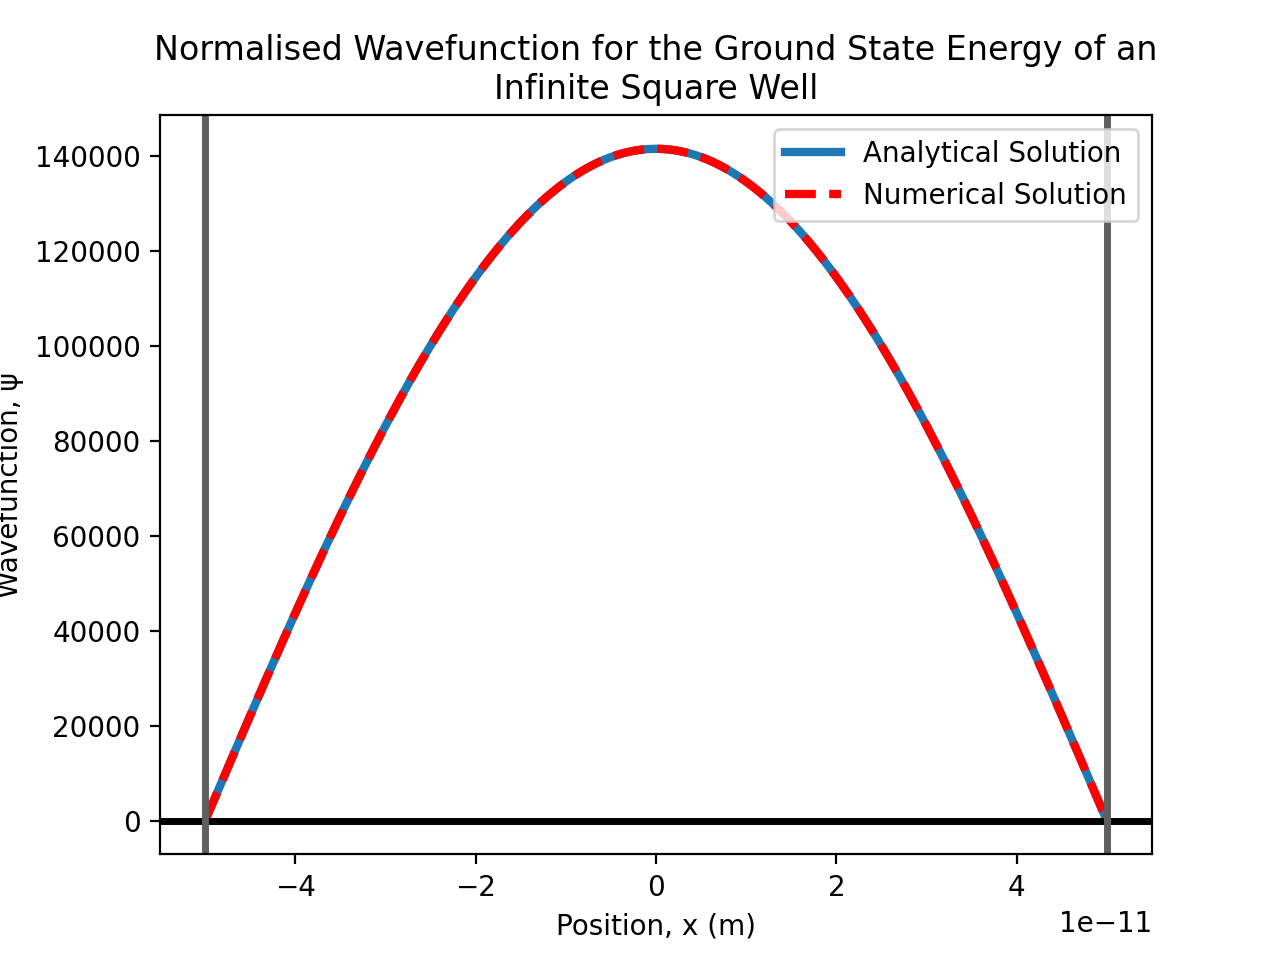

In [11]:
# Plotting the anaytical and numerical solutions to the ground state energy wavefunction.
plt.figure()
plt.plot(xplotpoints,infpotwavefunc(xplotpoints,a,1),linewidth=3,label="Analytical Solution") # Analytical solution.
plt.plot(xplotpoints,norm_wvfunc1,'r--',linewidth=3,label="Numerical Solution") # Numerical solution.
plt.axhline(c="k",ls="-", lw=2.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Wavefunction, ψ")
plt.title("Normalised Wavefunction for the Ground State Energy of an\nInfinite Square Well");

As can be seen from the above plot, the two wavefunctions entirely overlap; thus, the numerical solution to the wavefunction of a particle in an infinite square well at its ground state energy is calculated accurately and matches the theoretical model.

## Finding higher energy states (Section 3.3)

The next task will be to find the wavefunctions for the first few excited states using the same secant method used in **Section 3.1**. However, instead of using the analytical solution for the infinite square well to motivate the energy guesses for the excited states, I will be using a more generalised numerical method which will produce a value for the energy at given quantum states regardless of the potential energy of the system from which I can make energy guesses. This is because we will go on to define systems with potential energies that have no analytical solution, which would make the former method redundant. With that being said, in this section, I will be checking the validity of my numerical method for the energy guesses by using the analytical solution for the infinite square well to verify that my method is correct.

The method I will use to produce the initial energy guesses for my system is known as the **finite difference method** (Ph.D, 2019). Using this method, I will solve for the eigenvalues and eigenvectors for a given Schrodinger Equation- the eigenvalues will provide me with an approximate solution to the energy. Using this energy, I will be able to motivate two energy guesses so that the secant method will converge on the correct excited state.

The Time Independent Schrodinger equation for a one-dimensional quantum system can be seen in equation (2); hence, we can use the centred derivative formula (Riley, Hobson and Bence, 2006) to discretise this equation and write it as an expansion of algebraic terms rather than a second-order differential equation and this can be seen in equation (11) below:

$$
-\frac{\hbar^2}{2m}\bigg(\frac{\psi_{j+1}-2\psi_{j}+\psi_{j-1}}{s^{2}}\bigg) + V_{j}(x)\psi_{j}(x) = E\psi_{j}(x)\tag{11}
$$

Where $s$ denotes the step size (Ph.D, 2019).

To solve such an equation within a region $x \in [-a, a]$, a matrix of $N+1$ grid points will need to be constructed. By implementing the boundary conditions for our system $\psi_{0}=0$ and $\psi_{N}=0$, this leaves us with $N-1$ grid points that need to be filled. Therefore, we can construct a matrix equation using equation (11) to fill the remaining $N-1$ terms:

$$ -\frac{\hbar^2}{2ms^{2}}
\begin{pmatrix}
-2 & 1 & 0 &  & \ldots &  0  \\
1 & -2 & 1 & & \ldots &0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & 1 & -2 \\
\end{pmatrix} 
\begin{pmatrix}
\psi_{1} \\
\psi_{2} \\
\psi_{3} \\
\vdots \\
\psi_{N-1}
\end{pmatrix}
+
\begin{pmatrix}
V_{1}(x) & 0 & 0 & \ldots &  0  \\
0 & V_{2}(x) & & \ldots &0 \\
0 & 0 & V_{3}(x) & \ldots & 0 \\
\vdots &  & \ddots &  \vdots \\
0 & 0 & \ldots &  & V_{N-1}(x) \\
\end{pmatrix}
\begin{pmatrix}
\psi_{1} \\
\psi_{2} \\
\psi_{3} \\
\vdots \\
\psi_{N-1}
\end{pmatrix}
= E
\begin{pmatrix}
\psi_{1} \\
\psi_{2} \\
\psi_{3} \\
\vdots \\
\psi_{N-1}
\end{pmatrix}\tag{12}
$$


**(Ph.D, 2019) & (19014831, 2021b)**


By defining the Hamiltonian of the quantum system as in equation (13):

$$ 
H= -\frac{\hbar^2}{2ms^{2}}
\begin{pmatrix}
-2 & 1 & 0 &  & \ldots &  0  \\
1 & -2 & 1 & & \ldots &0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & 1 & -2 \\
\end{pmatrix} 
+
\begin{pmatrix}
V_{1}(x) & 0 & 0 & \ldots &  0  \\
0 & V_{2}(x) & & \ldots &0 \\
0 & 0 & V_{3}(x) & \ldots & 0 \\
\vdots &  & \ddots &  \vdots \\
0 & 0 & \ldots &  & V_{N-1}(x) \\
\end{pmatrix}\tag{13}
$$

Thus, the matrix equation can be written more elegantly as an eigenvalue equation:

$$ \mathbf{H}\mathbf{\psi} = E \mathbf{\psi} \tag{14}$$

Upon solving this eigenvalue equation, the eigenvalues of this equation will be the energies at different states; therefore, these energies can be extracted and used to make energy guesses for various states of a given quantum. This method will work for any given potential and, thus, solves the problem of not having an analytical solution to some quantum systems to motivate the energy guesses for the secant method.

In [12]:
## Code motivated by (Ph.D, 2019) & my submission to the Session 9 Task (19014831, 2021b):

def energyguesses(n,potential):
    '''
    This function will take in a value of a given energy state, n, and a potential energy function within
    the boundaries x[-a,a]- here, defined as xpoints. The function will then solve the eigenvalue equation 
    describing the quantum system and produce an array of eigenvalues and eigenfunctions. The eigenvalues 
    will correspond to energy states; therefore, for a particular energy state, n, a numerical solution for the
    energy of that given state will be found. This eigenvalue will then be used to motivate energy guesses to 
    be used in the secant method to converge to the correct energy level and produce a corresponding wavefunction
    using the Runge-Kutta function.
    Inputs:
        n: energy level of the wavefunction in consideration.
        potential: the function describing the potential energy of the system.
    Outputs:
        Eguesses: an array containing two energy guesses which can be used to converge onto an energy level
                  using the secant method,
    '''
    
    # Begin by generating the kinetic energy matrix, T, as shown in equation (12):
    
    D1= np.zeros(N-2) # Initializing the array of (N-2) diagonal elements in the  central diagonal of the T matrix.
    D2= np.zeros(N-3) # Initializing the array of (N-3) diagonal elements in the  upper and lower diagonals of the T matrix. 
    for i in range(N-2): # This loop will set the central diagonal matrix element values.
        D1[i]= -2
    for i in range(N-3): # This loop will set the upper and lower diagonal matrix element values.
        D2[i]= 1
    T = np.diag(D1) + np.diag(D2,k=1) +  np.diag(D2,k=-1) # Constructing the matrix T with the central, upper and lower diagonal elements calculated above.
    
    # Then, generate the potential energy matrix, V, as shown in equation (12):
    D3= np.zeros(N-2) # Initializing the array of diagonal elements in the central diagonal of the V matrix.
    for i in range(N-2): # This loop will set the central diagonal matrix element values using the potential energy function 
                         # at particular x values.
        D3[i]= potential(xpoints[i+1])
    V=np.diag(D3)
    
    # Thus, using T and V, the Hamiltonian, H, can be constructed as shown in equation (13):
    H=(-h**2/(2*m*step**2))*T+V
    
    # Solving the eigenvalue equation given in equation (14):
    eigval,eigvec=np.linalg.eig(H)
    z = np.argsort(eigval) # This will rearrange the indices in ascending order to get the energy eigenvalues in the
                           # in the order we would like them in.
    E=eigval[z] # The array E will know hold all of the Energy solutions in the correct ascending order.
    Eguess1=E[n-1]*0.95 # The first guess will be 5% below the energy of a given state, n. The square bracket of [n-1] is purely for indexing purposes.
    Eguess2=E[n-1]*1.05 # The first guess will be 5% above the energy of a given state, n. The square bracket of [n-1] is purely for indexing purposes.
    Eguesses=np.array([Eguess1,Eguess2]) # Generating an array of Energy guesses which can be used to converge onto the correct
                                         # energies of a given state, n, using the secant method.
    return Eguesses

The `energyguesses` function above can now be used to numerically solve for a quantum system that has an infinite potential at the boundaries $-a$ and $a$ with any given potential energy function describing the potential at the base of the infinite well. 

In the following code cell, I will test the validity of these energy guesses to converge to the correct energy level for a given $n$ below. I will plot the numerical solution for the wavefunction and the analytical solution for the wavefunction on the same plot as in the previous section to illustrate my energy guesses method's validity.

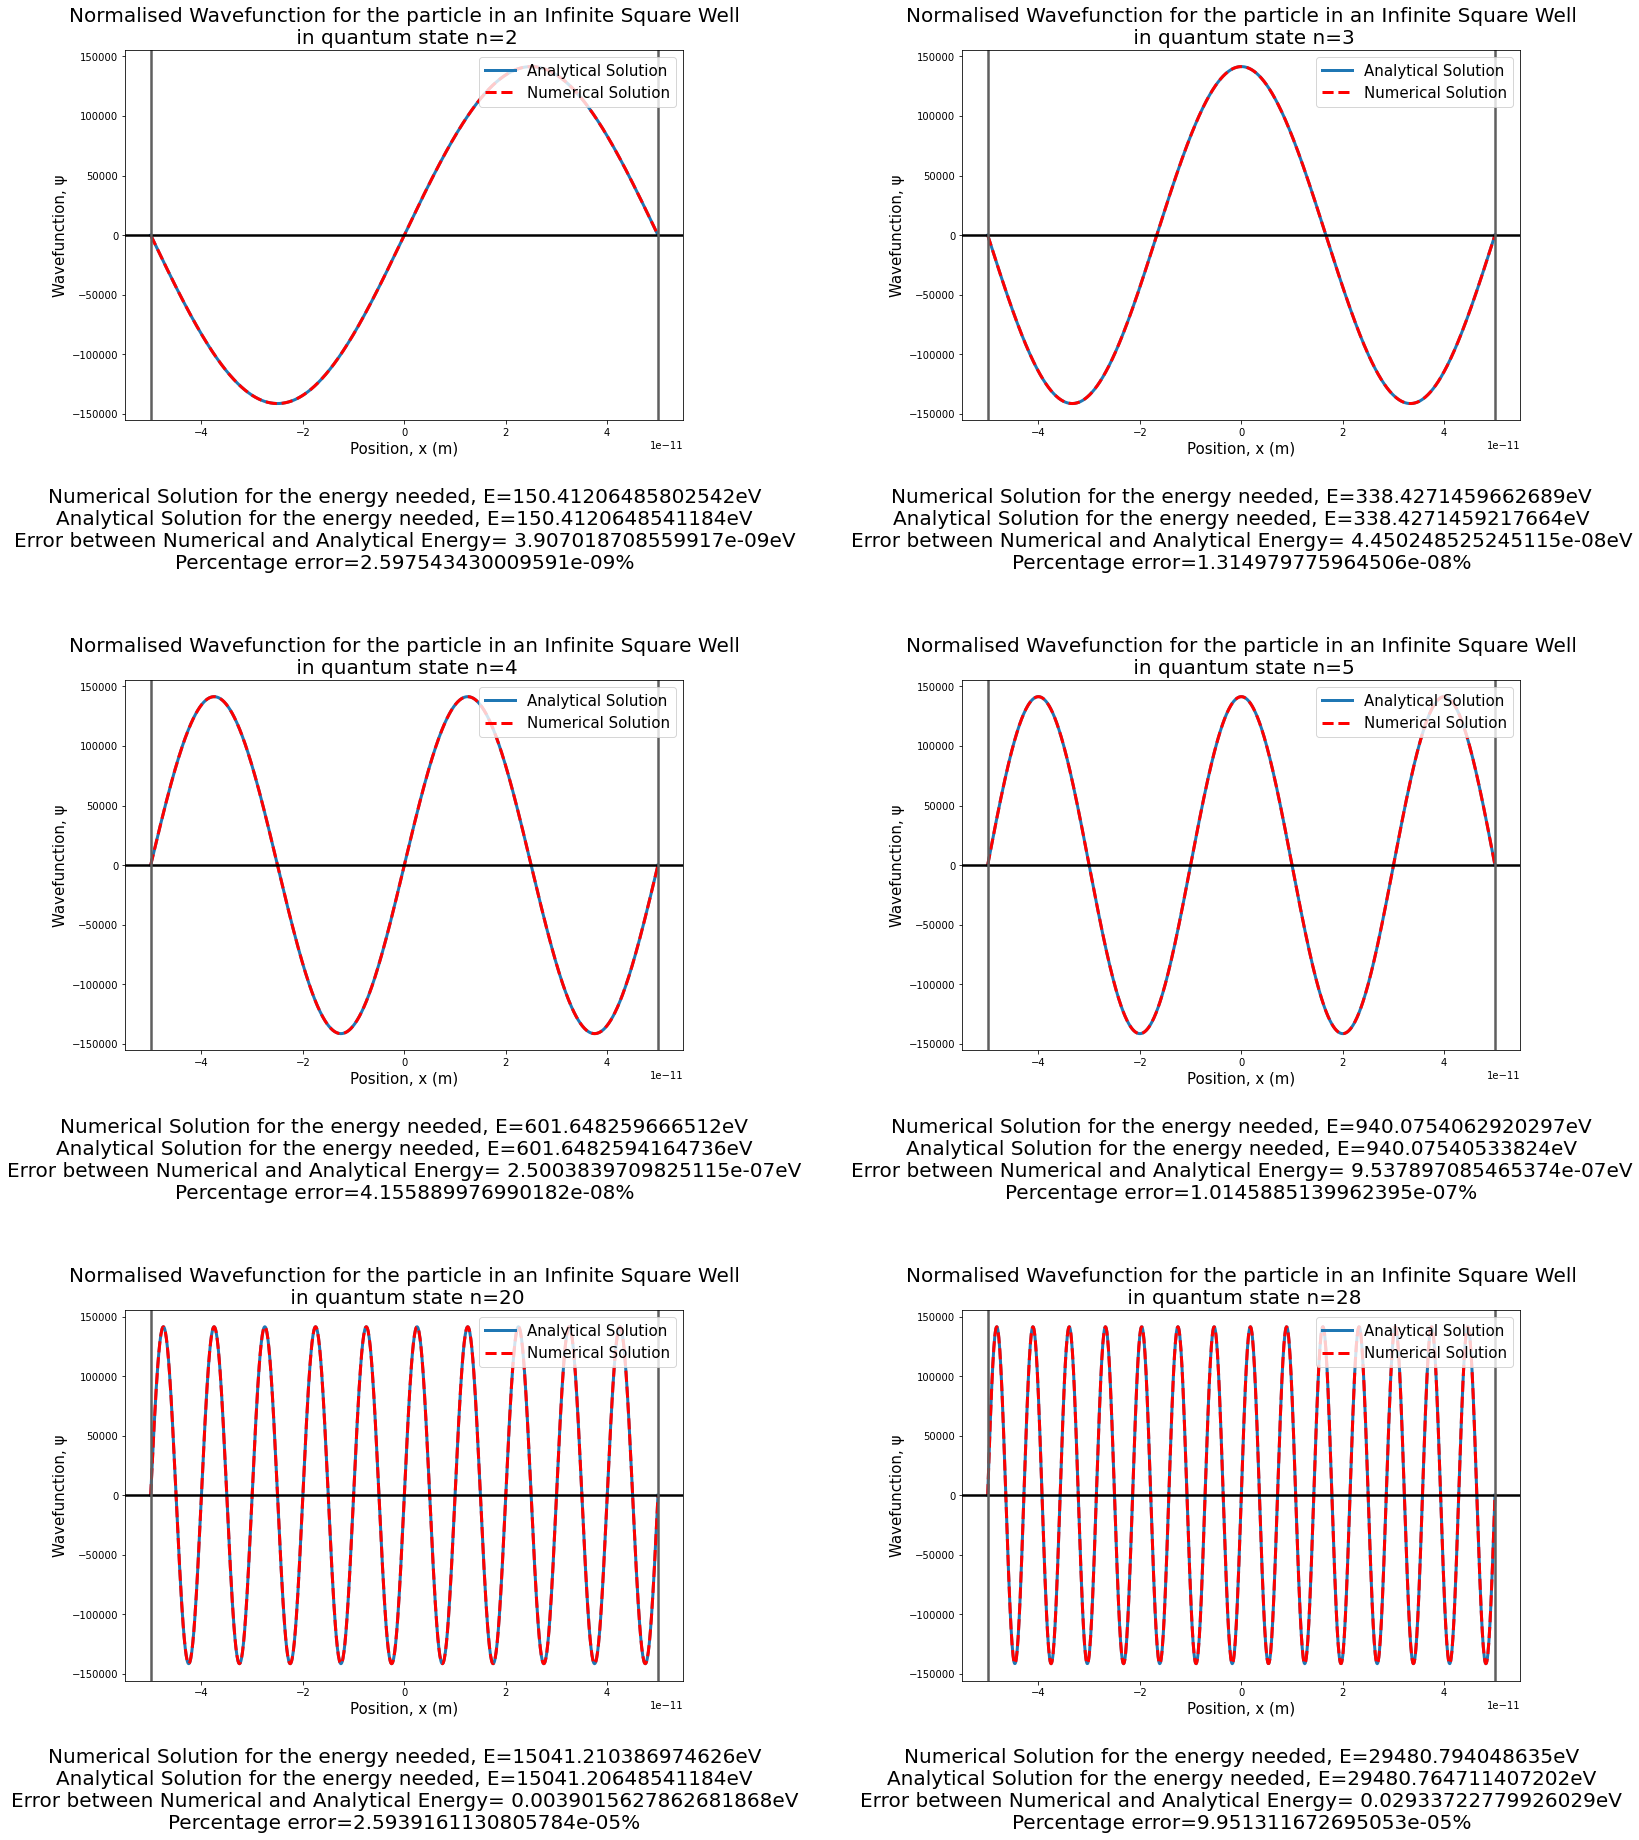

In [13]:
## Adapted code from Section 3.1 and 3.2 to illustrate that the new function works in finding the numerical 
## solutions to various energy states (n=2,3,4,5,20,28) and outputting these states along with the analytical plot.

# First I change the plot type from 'notebook' to 'inline' to be able to output all of the states of interest side by side.
%matplotlib inline 
n_array=np.array([2,3,4,5,20,28]) # This array will be used in the for loop to calculate the various energy states.
figure1=plt.figure(figsize=(25,30))
index=1
for n in n_array: # This loop will only run for n=2,3,4,5,20,28.
    # Initial Conditions
    E1= energyguesses(n,infpotential)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,infpotential)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,infpotential, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,infpotential, E2)[N] # guesses for energy 
                                                                                         # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,infpotential, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, infpotential, E2)[N]

    # Converting the energy (J) into eV:
    E_final= E3/e    
    ## Actual value of the ground state energy for an infinite square well.
    E_real= ((np.pi**2*h**2*n**2)/(2*m*(2*a)**2))/e
    # Actual difference between the numerical solution and the analytical solution
    E_error= abs(E_real-E_final)
    # Percentage difference in the numerical solution and the analytical solution
    E_perror=(E_error/E_real)*100
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # For n=2 and n=3, the numerical solution was shifted by pi for an initial phi condition of phi=1; this problem
    # is solved easily by setting the arbitrary initial phi condition to be phi=-1, which is what the if statement below carries out.
    # This problem did not occur for the other states in n_array therefore, the initial condition for phi=1 
    # remained for n=4,5,20,28 (these fall into the 'else' category)
    if n==2 or n==3:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, infpotential, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, infpotential, E3)
    
    # Calculating the normalised wavefunction by dividing the un-normalised wavefunction by the integral of the square modulus 
    # of the wavefunction as calculated using the integration function.
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index) # This will generate 3 rows of subplots with 2 subplots in each row.
    # Plotting the analytical and numerical solutions as before.
    ax.plot(xplotpoints,infpotwavefunc(xplotpoints,a,n),linewidth=3,label="Analytical Solution") # Analytical solution.
    ax.plot(xplotpoints,norm_wavefunc,'r--',linewidth=3,label="Numerical Solution") # Numerical solution.
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    # Labelling the plot.
    ax.legend(loc='upper right', fontsize=15)
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in an Infinite Square Well\n in quantum state n={0}".format(n),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.4, "Numerical Solution for the energy needed, E={0}eV\nAnalytical Solution for the energy needed, E={1}eV\nError between Numerical and Analytical Energy= {2}eV\nPercentage error={3}%".format(E_final,E_real,E_error,E_perror), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.7) # Separating the plots by generating space in between them.

As can be seen from the above plots, the `energyguesses` function serves as a valid way to determine a quantum system's initial guesses at a given energy level, $n$. This has been explicitly shown for energy levels $n=2$, $3$, $4$, $5$, $20$ and $28$. 

The only problem I encountered when plotting the wavefunctions was that the numerical solutions to the wavefunction for energy levels $n=2$ and $n=3$ was the analytical solution with a $\pi$ phase shift applied; this resulted in the numerical solution being completely out of phase with the analytical solution. This problem stems from the arbitrary assignment of the value of $\phi$, and it is solved by assigning a negative initial value of $\phi$ to the energy levels, which result in the analytical and numerical solutions being in phase. Hence, in the above code cell, there is an `if` statement which fixes this problem by changing the initial value of $\phi$ to $\phi= -1$ for those wavefunctions where the numerical solution is completely out of phase with the analytical solution; the `else` statement will keep $\phi=1$ for those wavefunctions where the numerical solution matches the analytical solution exactly and is in phase.

As a result, from plotting these energy levels, a further observation can be made about the role of the initial value of $\phi$ on the resulting wavefunction; if we recall from equation (3), $\phi$ is the particle's initial velocity (i.e. the first derivative of the particle wavefunction with respect to time=0). Although the size of the initial value of $\phi$ is arbitrary and has no bearing on the normalised wavefunction (as seen in **Section 3.2**) the sign of the initial value does, in fact, matter. If the incorrect sign is applied, the numerical solution to the wavefunction will lag behind (or lead) the analytical solution by $\pi$ radians and will need to be adjusted accordingly.

## The infinite "unsquare" well (Section 4)

In this section, I will build upon the work done in the previous sections by considering different potential energy functions embedded in the base of the infinite potential well setting- as a result, the boundary conditions that $V(x)=\infty$ for $|x|>a$ still applies. Some of these potentials will have no analytical solution to compare my numerical solution to; however, as seen in **Section 3.3**, my method to determine numerical solutions is valid and should still work regardless of the potential energy function present at the base of the infinite potential well.

### I. Harmonic Potential

The first potential energy function to be considered inside the infinite potential well will be the **harmonic potential function** of the form:

$$
V(x) = V_0 \frac{x^2}{a^2}\tag{15}
$$

**Equation taken from (Dash, 2020)**

This will be compared to the analytical form of a pure quantum harmonic oscillator which has a potential of the form:

$$
V(x) = \frac{\omega_{0}^{2}m}{2}x^2\tag{16}
$$

Which will result in the Time Independent Schrodinger equation for this system becoming:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + \frac{\omega_{0}^{2}m}{2}x^2 \psi(x) = E\psi(x)\tag{17}
$$

Solving this equation, we see that the wavefunction solutions at a given energy, $n$ are given by equation (18):

$$
\psi(x) = A_nH_n(y)e^{-y^2/2},\quad n=0,1,2,3...\tag{18}
$$

Note, the range of values of this quantum number is different from the range of values of the quantum number in the infinite square well ($n_{inf}=1,2,3...$) as this quantum number starts from $0$ rather than $1$.

We also define:

$$
y = \sqrt\frac{m\omega_0}{\hbar}x\tag{19}
$$

And $H_n(y)$ denotes the **Hermite polynomials** which are a class of polynomials with the general form:

$$
H_n(y)=\sum_{p=o}^{n}a_py^p\tag{20} 
$$

Finally, the constant $A_n$ serves as a normalising constant due to the Hermite polynomials being unnormalised; we normalise the wavefunction in the same way as before using equation (8).

Finally, the analytical energy eigenvalues to this equation are given by:

$$
E_n=\hbar\omega_0\bigg(n+\frac{1}{2}\bigg), \quad n=0,1,2,3...\tag{21}
$$

(Schofield, 2020)

I will begin by defining the constant, $V_0$, and the variable $\omega$. An expression for the value of $\omega_0$ can be found by solving equations (15) and (16) simultaneously:

$$
\omega_0=\sqrt\frac{2V_0}{ma^2}\tag{22}
$$

In [14]:
# Defining the constant V_0 and the variable omega based on equation (22)
V_0= 1000*e
omega= np.sqrt((2*V_0)/(m*a**2))

In the code cell below, I use equation (15) to generate a function for an embedded harmonic potential within the infinite well with the boundary condition of $V(x)=\infty$ for $|x|>a$ still applying.

In [15]:
# Coding a function for the purposes of an infinite harmonic potential well.
def harmonicpotential(x): 
    '''
    This function will take in values of x and output a corresponding value for the potential at a given x using
    equation (15) defined in this notebook.
        Inputs: 
            x= position of the particle.
        Output: 
            V= potential energy function at each inputted x value.
    '''
    V= V_0*(x**2/a**2)
    return V

Next, I will define a function which will produce an analytical solution to the infinite harmonic potential well using equation (18). I also import the python module `scipy.special` which will allow me to use the `scipy.special.eval_hermite` function which evaluates the hermite polynomials defined in equation (20) for an inputted value of $n$ and $y$- I also define $y$ using equation (19).

In [16]:
## The information on scipy.special.eval_hermite(n, y) was obtained from (GitHub, 2020) & (scipy.github.io, n.d.)
import scipy.special as sp # Importing the relevant python module needed to use the hermite polynomial evaluation function below.
def harmonicwavefunc(x,a,n):
    '''
    This function will calculate the analytical solution for a wavefunction at a given energy state in the infinite
    harmonic potential well for a given half-width of the whole region in consideration, a.
    Inputs: 
        x: the x values over which the wavefunction will be defined.
        a: the half-width of the full region in which the wavefunction is defined.
        n: energy level of the wavefunction in consideration.
    Outputs:
        norm_wavefunc_n: the normalised wavefunction for a given energy state, n.
    '''
    y=np.sqrt((m*omega)/h)*x # Defining the variable y from equation (19).
    hermite= sp.eval_hermite(n, y) # Using the hermite polynomial function to evaluate the hermite polynomials for a given n and y
                                   # which will be used to determine the wavefunction of a given energy state as stated in equation (18).
    unnorm_wavefunc_n=hermite*np.exp(-y**2/2) # Calculating the un-normalised wavefunction using the hermite polynomials.
    norm_wavefunc_n= unnorm_wavefunc_n/np.sqrt(integration((abs(unnorm_wavefunc_n))**2 ,step)) # Normalising the wavefunction using the same integration method given in equation (8).
    
    return norm_wavefunc_n

Now that everything is set up, I will use the same methodology as in **Section 3.3** to generate a series of plots illustrating the numerical and analytical wavefunction solutions to the infinite harmonic potential well for the first six energy states. 

I will also generate a separate plot that will illustrate the form of the infinite harmonic potential well, overlayed with the numerical and analytical energy eigenvalue solutions to the Time Independent Schrodinger Equation as defined in equation (17).

From these plots, I will be able to notice any differences between the numerical eigenfunction and eigenvalue solutions obtained using my method defined in **Section 3.3** and the analytical solutions to this quantum system.

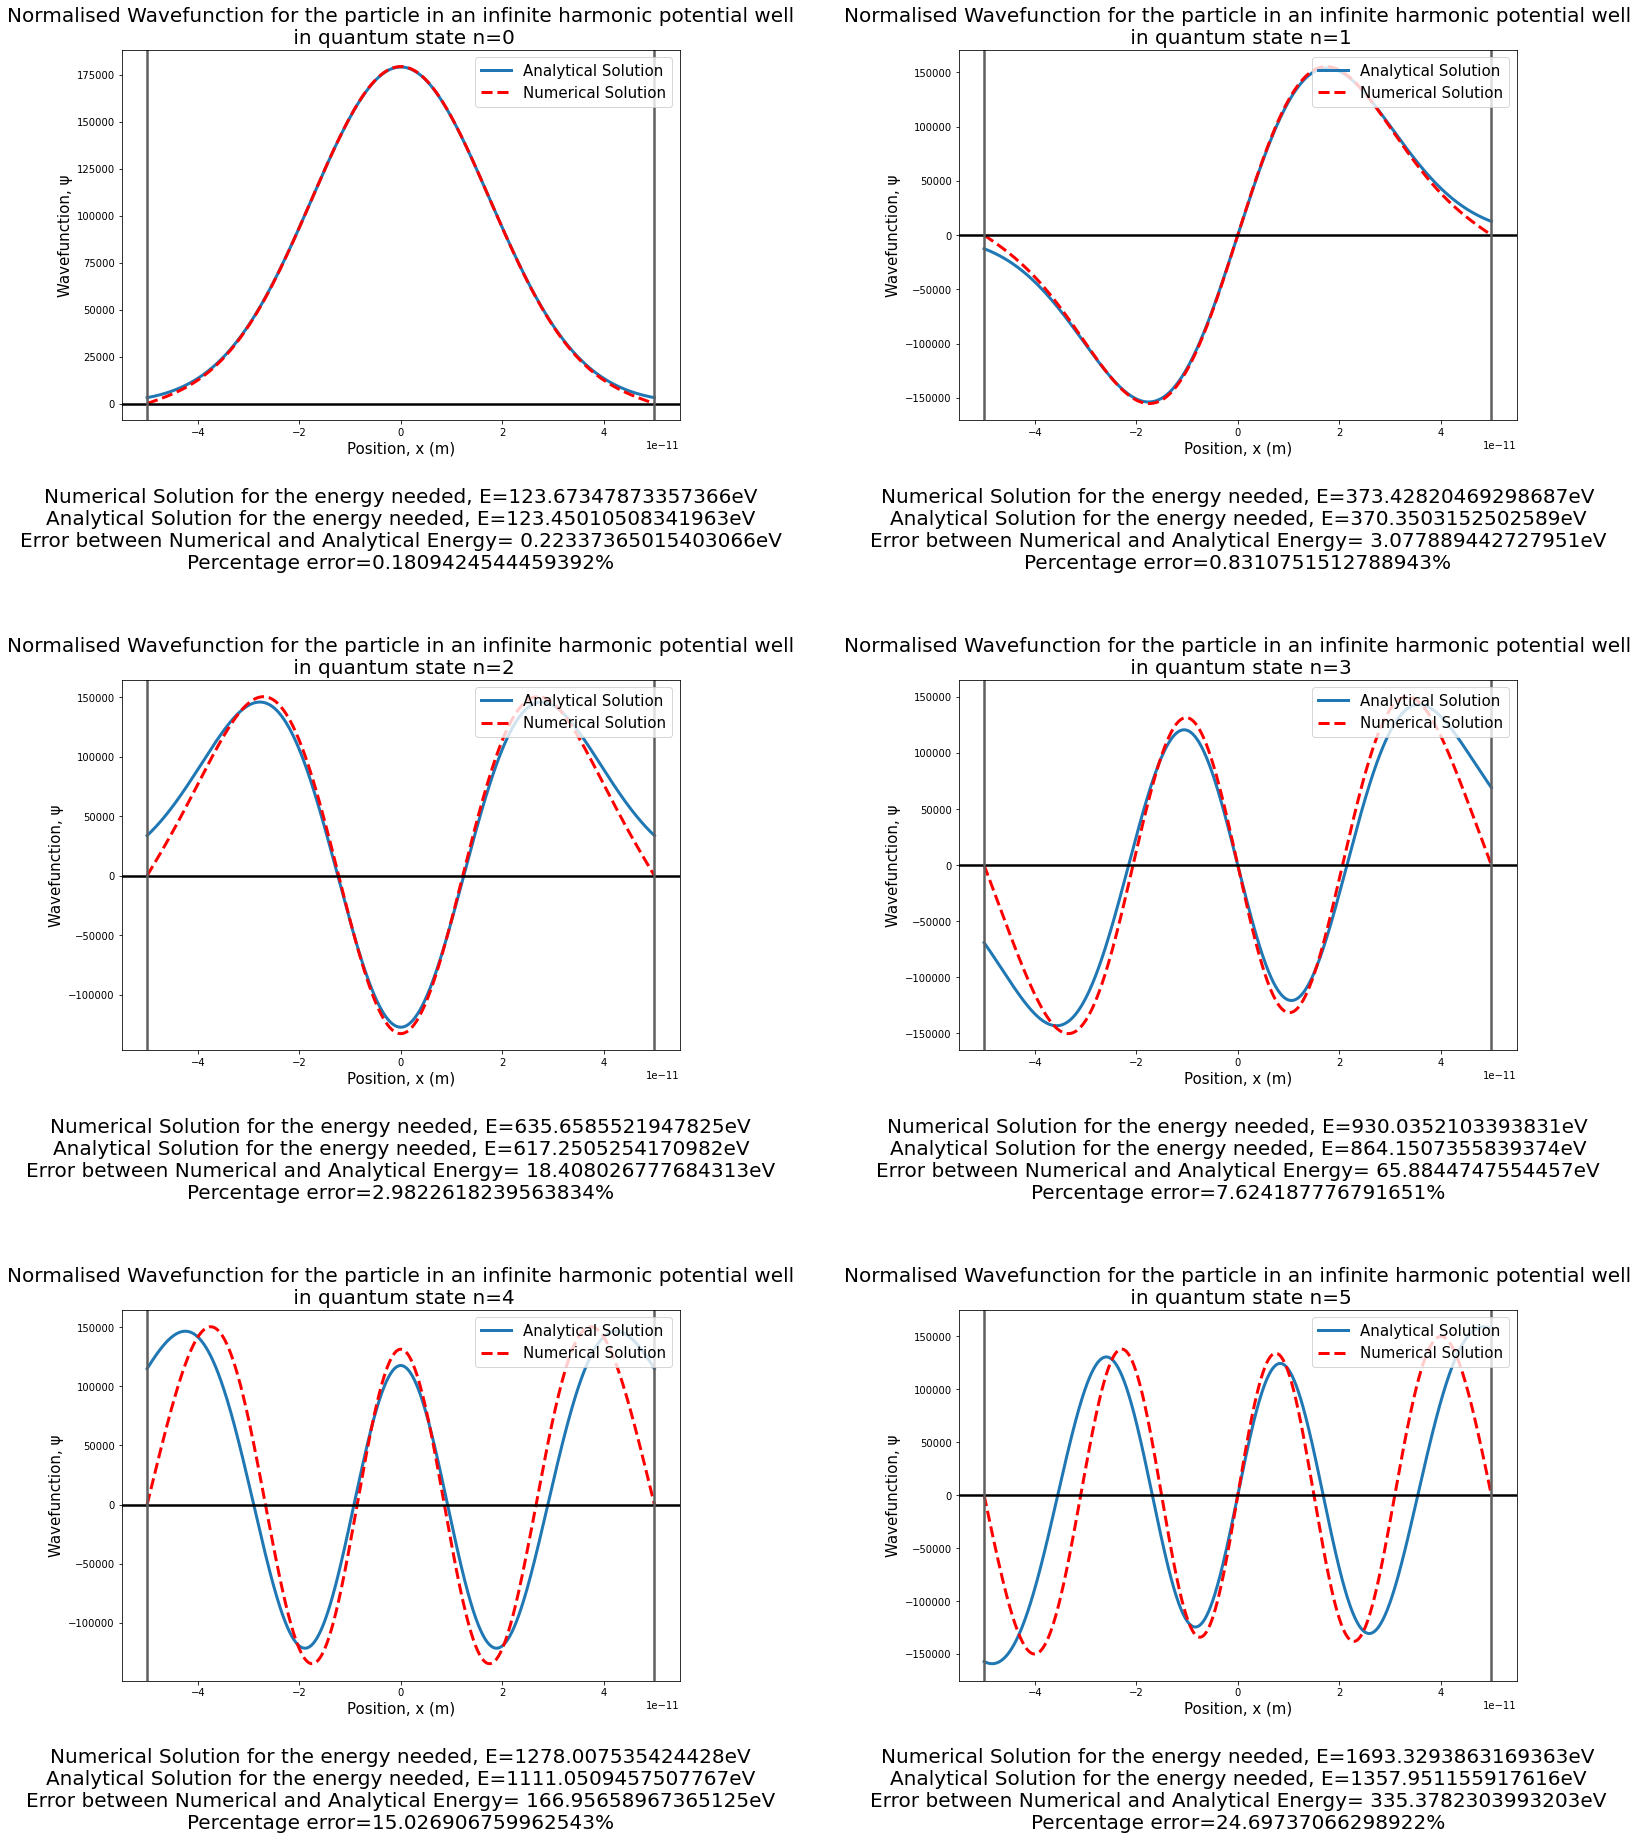

In [17]:
## Code adapted from Section 3.3
# Producing numerical and analytical solutions to the infinite harmonic potential well using the same method as in Section 3.3.
n_array=np.array([1,2,3,4,5,6]) # This array will be used in the for loop to calculate the various energy states.
figure1=plt.figure(figsize=(25,30))
index=1
# Initialising two arrays to be able to plot the numerical and analytical energies for a given state, n, in the next part.
num_energies=[]
analytic_energies=[]
for n in n_array:
    # Initial Conditions
    E1= energyguesses(n,harmonicpotential)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,harmonicpotential)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,harmonicpotential, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,harmonicpotential, E2)[N] # guesses for energy 
                                                                                              # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,harmonicpotential, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, harmonicpotential, E2)[N]
        
    # Converting the energy (J) into eV:
    E_final= E3/e    
    ## Actual value of the ground state energy for an infinite square well.
    E_analytic= (h*omega*((n-1)+1/2))
    E_real= E_analytic/e
    # Actual difference between the numerical solution and the analytical solution
    E_error= abs(E_real-E_final)
    # Percentage difference in the numerical solution and the analytical solution
    E_perror=(E_error/E_real)*100
    
    num_energies.append(E_final)
    analytic_energies.append(E_real)
    
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # Correcting for the phase shifts that occur in some of the states.
    if n==2 or n==4 or n==6:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, harmonicpotential, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, harmonicpotential, E3)
    
    # Normalising the wavefunction.
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index)
    # Plotting the analytical and numerical solutions as before.
    ax.plot(xplotpoints,harmonicwavefunc(xplotpoints,a,n-1),linewidth=3,label="Analytical Solution") # Analytical solution.
    ax.plot(xplotpoints,norm_wavefunc,'r--',linewidth=3,label="Numerical Solution") # Numerical solution.
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    # Labelling the plot.
    ax.legend(loc='upper right', fontsize=15)
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in an infinite harmonic potential well\n in quantum state n={0}".format(n-1),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.4, "Numerical Solution for the energy needed, E={0}eV\nAnalytical Solution for the energy needed, E={1}eV\nError between Numerical and Analytical Energy= {2}eV\nPercentage error={3}%".format(E_final,E_real,E_error,E_perror), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.7) # Separating the plots by generating space in between them.

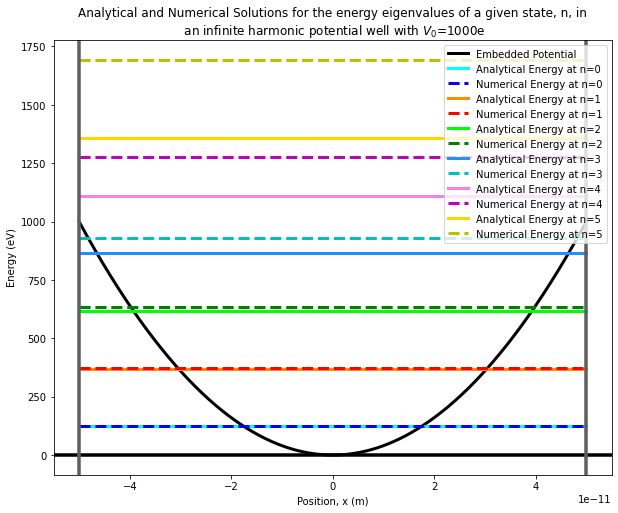

In [18]:
plt.figure(figsize=(10,8))
# Plotting the potential curve
plt.plot(xplotpoints,(harmonicpotential(xplotpoints)/e),'k',linewidth=3,label="Embedded Potential")
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=0.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[0],'cyan',linewidth=3,label="Analytical Energy at n={0}".format(n_array[0]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[0],'b--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[0]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=1.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[1],'darkorange',linewidth=3,label="Analytical Energy at n={0}".format(n_array[1]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[1],'r--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[1]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=2.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[2],'lime',linewidth=3,label="Analytical Energy at n={0}".format(n_array[2]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[2],'g--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[2]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=3.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[3],'dodgerblue',linewidth=3,label="Analytical Energy at n={0}".format(n_array[3]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[3],'c--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[3]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=4.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[4],'violet',linewidth=3,label="Analytical Energy at n={0}".format(n_array[4]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[4],'m--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[4]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=5.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[5],'gold',linewidth=3,label="Analytical Energy at n={0}".format(n_array[5]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[5],'y--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[5]-1)) # Numerical energy.
plt.axhline(c="k",ls="-", lw=3.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=3.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=3.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Energy (eV)")
plt.title("Analytical and Numerical Solutions for the energy eigenvalues of a given state, n, in\n an infinite harmonic potential well with $V_0$=1000e");

From the above plots, it can be seen that for a given potential, $V_0=1000e$, which defines the harmonic potential, the numerical wavefunction solutions for the ground state and the first excited state are very close and only differ slightly towards the 'tails' of the curves as the wavefunction approaches the boundaries at $-a$ and $a$. The percentage error in the analytical and numerical energy eigenvalues that are calculated for these two states are both minimal, with both lying below 1%; this can also be seen in the plot of the analytical and numerical energy eigenvalues at each quantum state, if we consider the ground state and the first excited state, we can see that the numerically calculated energy eigenvalues very closely match the analytically calculated energy eigenvalues.

With that being said, as the energy state, $n$, in consideration begins to increase, we see that both the numerical and analytical wavefunction solutions and the numerical and analytical energy eigenvalue solutions begin to deviate increasingly. Considering energy state $n=2$, the wavefunction solutions are closely matched in the centre of the plot between around $-3\times10^{-11}m$ and $3\times10^{-11}m$; however, as the wavefunction approaches the boundaries at $a$ and $-a$ they begin to deviate with the numerical solution reaching 0 at the boundaries and the analytical solution approaching 0 asymptotically. For the remaining calculated energy states ($n=3,4,5$), the difference in the analytical and numerical solution to the wavefunctions increases as the energy state increases. This is also relayed in the energy eigenvalue solutions for the energy states higher than $n=1$; we can see that as the energy state increases, the difference in the numerical and analytical energy values begin to differ by greater magnitudes and have more significant percentage errors; an example of this can be seen as the percentage difference in the energies for the $n=3$ state was $7.62$%, and the percentage difference in the energies for the $n=5$ state was $24.69$%, and this can also visually be seen by the size of the gaps between the analytical and numerical energy eigenvalues for these excited states.

A reason for this could be that my numerical method requires the initial value of the wavefunction, $\psi$, to equal 0. By using the secant method with the tolerance of $\frac{e}{1e10}$ this means that the energy that is converged to using the secant method is one in which the wavefunction has a value of 0 at final boundary, i.e. $\psi(-a)=0$ and $\psi(a)=0$. However, as this is not the case in the real solution to the infinite harmonic potential well, this leads to inaccurate numerical energy and wavefunction solutions for higher energy states. At these higher energy states, the wavefunction values at the boundaries become increasingly further away from 0. A possible way to fix this problem would be to try and converge to an energy using the secant method where the initial and final values of the numerical wavefunction matched the analytical wavefunction solution for a given energy state. However, as the wavefunctions and the energies are calculated in a loop, it will be difficult to converge to energies which provide a numerical wavefunction that matches the analytical wavefunction solutions at a given energy state; this is because the initial and final values of each analytical wavefunction changes depending on the energy state of the quantum system.

Another method to fix this problem would be to change the value of $V_0$ to alter the harmonic potential within the infinite well as $V(x) \propto V_0$. We require the potential to be of a magnitude such that the analytical wavefunction solutions for each energy state are focused more in the middle of the potential well and level off to 0 at the infinite potential boundaries; this will allow our numerical method, which requires that $\psi(-a)=0$ and $\psi(a)=0$, to converge to the same energy as the analytical solution for a given energy state and so will produce wavefunction solutions which match the analytical solutions to high accuracy.

Trialling a decrease $V_0$, this leads to a parabolic potential which is less steep; therefore, the analytical wavefunctions at each energy state are not focused towards the middle of the potential well, and so at the infinite potential boundaries, the wavefunctions are further away from 0 than they were in the above case- this led to further inaccuracy in the numerical solutions. On the other hand, increasing $V_0$ leads to a parabolic potential that is steeper than the quantum system illustrated above and leads to the analytical wavefunctions being focused in the middle of the potential well and going to 0 at infinite potential boundaries. As predicted, this quantum system allowed my numerical method to converge to energies that matched the analytical solution with great accuracy. Thus, the numerical and analytical wavefunction solutions are completely matched, as shown below.

In [19]:
# Increasing the value of V_0.
V_0= 10000*e
omega= np.sqrt((2*V_0)/(m*a**2))

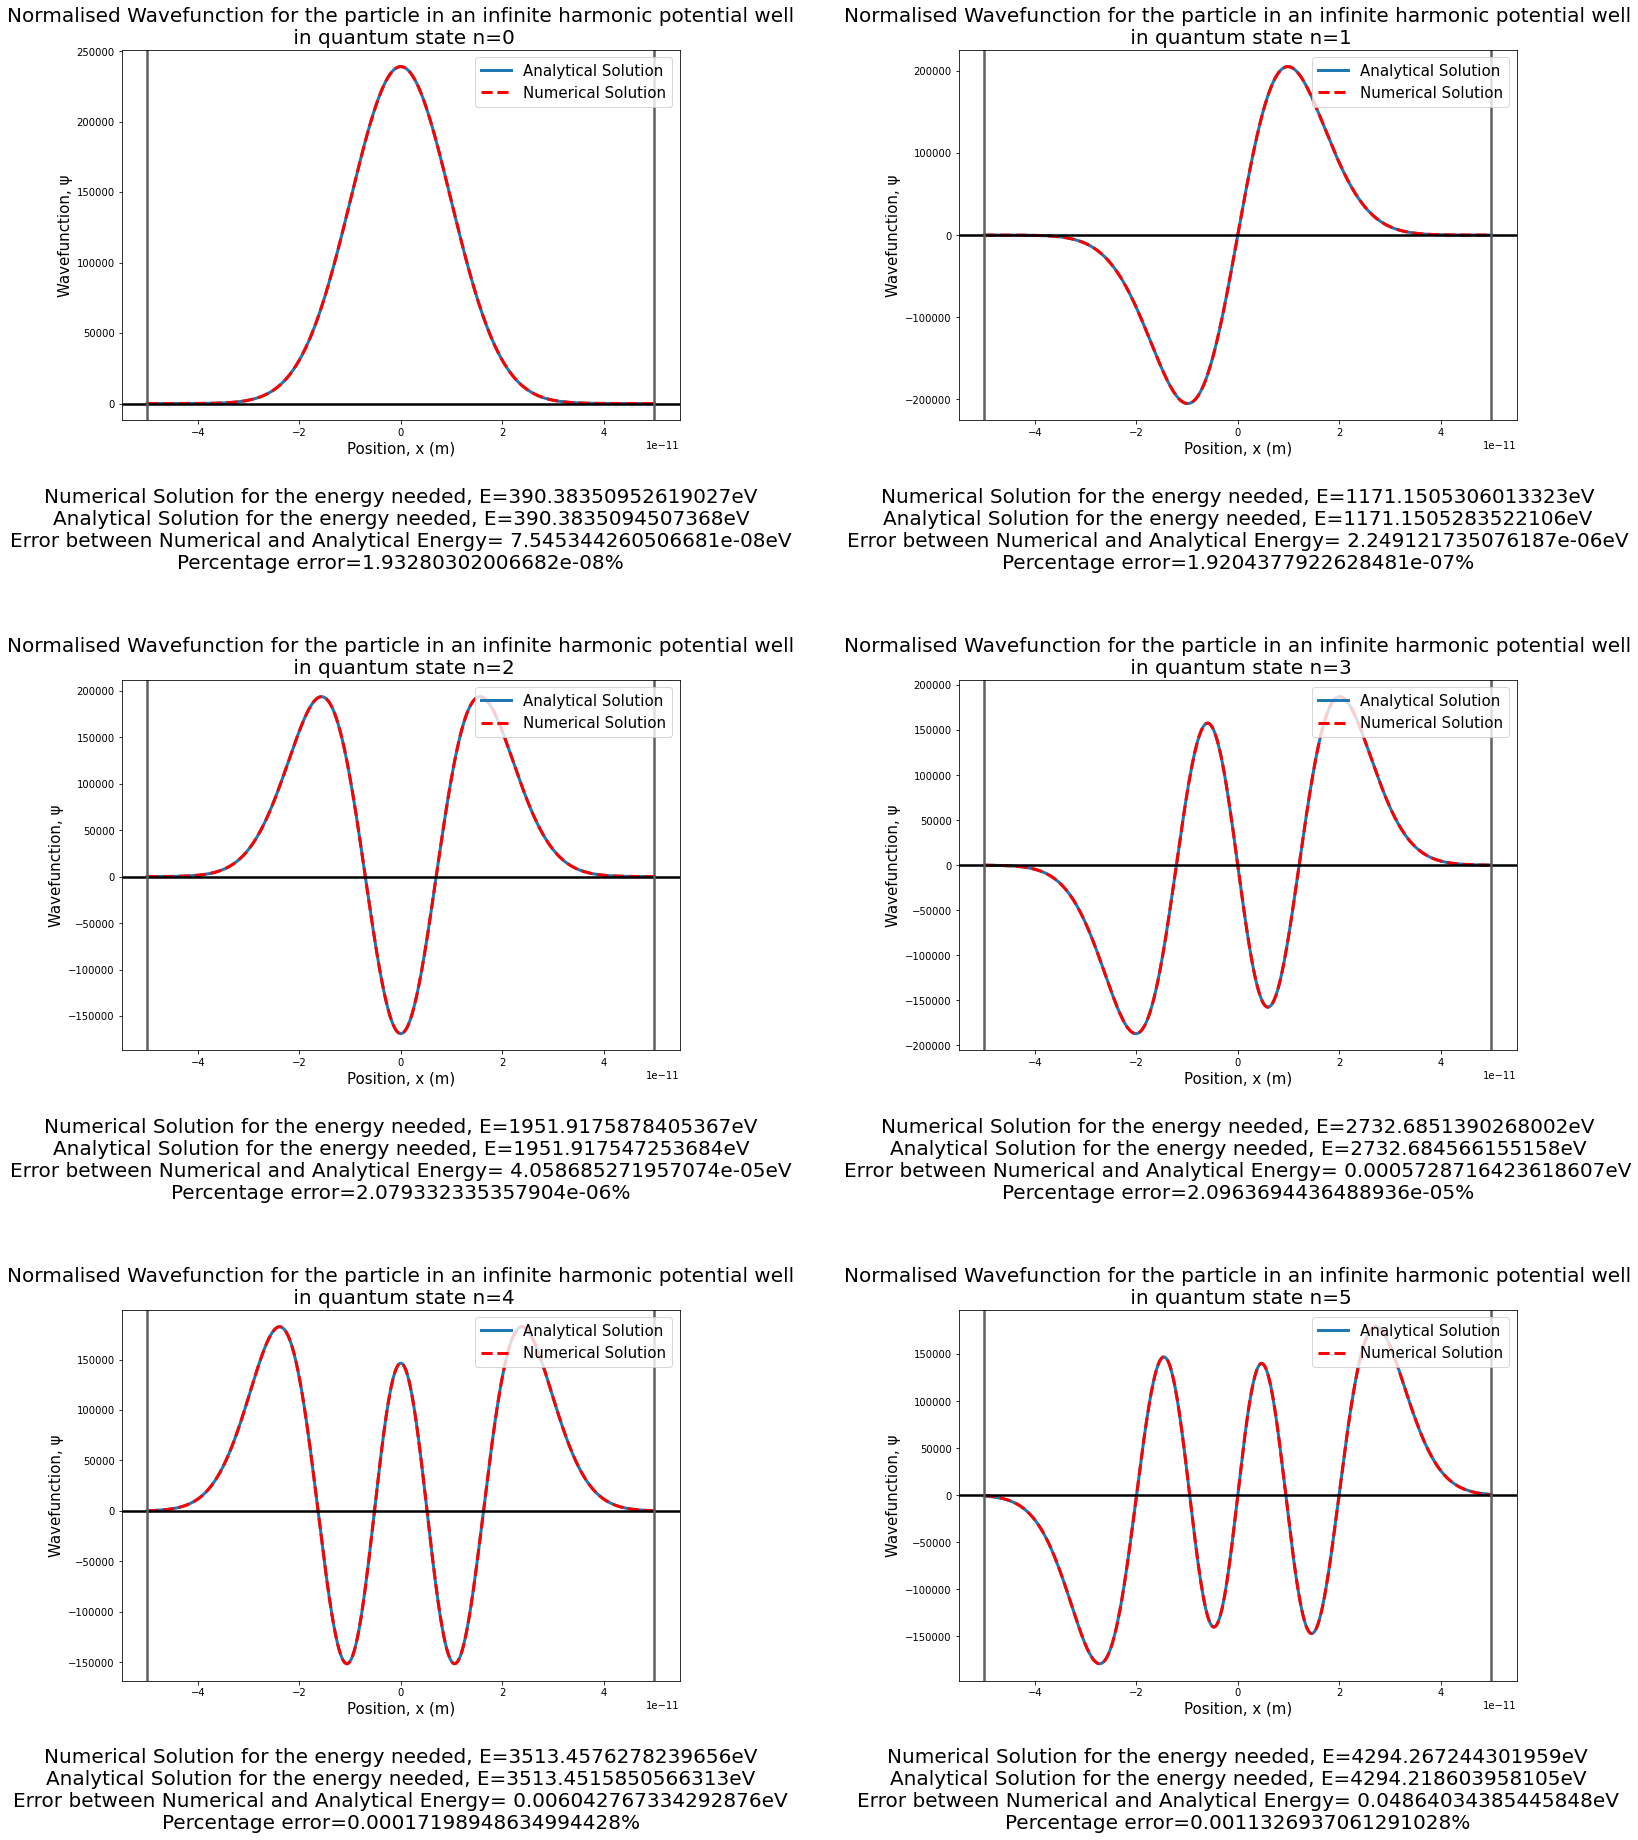

In [20]:
## Code adapted from Section 3.3
# Producing numerical and analytical solutions to the infinite harmonic potential well using the same method as in Section 3.3.
n_array=np.array([1,2,3,4,5,6]) # This array will be used in the for loop to calculate the various energy states.
figure1=plt.figure(figsize=(25,30))
index=1
# Initialising two arrays to be able to plot the numerical and analytical energies for a given state, n, in the next part.
num_energies=[]
analytic_energies=[]
for n in n_array:
    # Initial Conditions
    E1= energyguesses(n,harmonicpotential)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,harmonicpotential)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,harmonicpotential, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,harmonicpotential, E2)[N] # guesses for energy 
                                                                                              # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,harmonicpotential, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, harmonicpotential, E2)[N]
        
    # Converting the energy (J) into eV:
    E_final= E3/e    
    ## Actual value of the ground state energy for an infinite square well.
    E_analytic= (h*omega*((n-1)+1/2))
    E_real= E_analytic/e
    # Actual difference between the numerical solution and the analytical solution
    E_error= abs(E_real-E_final)
    # Percentage difference in the numerical solution and the analytical solution
    E_perror=(E_error/E_real)*100
    
    num_energies.append(E_final)
    analytic_energies.append(E_real)
    
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # Correcting any phase shifts that occur in some of the states.
    if n==2 or n==4 or n==6:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, harmonicpotential, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, harmonicpotential, E3)
    
    # Normalising the wavefunction.
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index)
    # Plotting the analytical and numerical solutions as before.
    ax.plot(xplotpoints,harmonicwavefunc(xplotpoints,a,n-1),linewidth=3,label="Analytical Solution") # Analytical solution.
    ax.plot(xplotpoints,norm_wavefunc,'r--',linewidth=3,label="Numerical Solution") # Numerical solution.
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    # Labelling the plot.
    ax.legend(loc='upper right', fontsize=15)
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in an infinite harmonic potential well\n in quantum state n={0}".format(n-1),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.4, "Numerical Solution for the energy needed, E={0}eV\nAnalytical Solution for the energy needed, E={1}eV\nError between Numerical and Analytical Energy= {2}eV\nPercentage error={3}%".format(E_final,E_real,E_error,E_perror), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.7) # Separating the plots by generating space in between them.

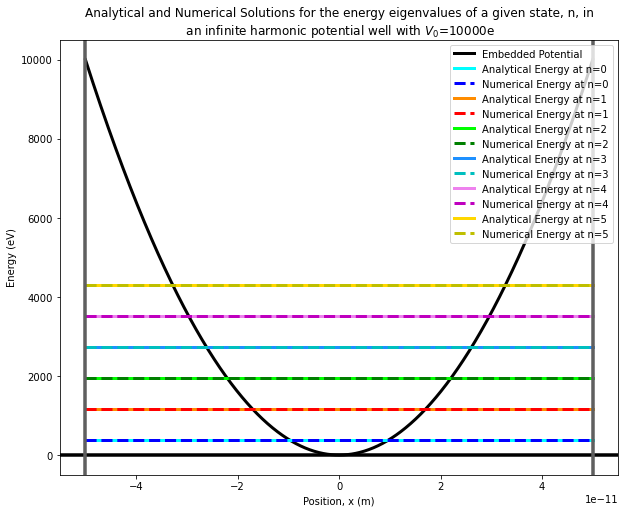

In [21]:
plt.figure(figsize=(10,8))
# Plotting the potential curve
plt.plot(xplotpoints,(harmonicpotential(xplotpoints)/e),'k',linewidth=3,label="Embedded Potential")
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=0.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[0],'cyan',linewidth=3,label="Analytical Energy at n={0}".format(n_array[0]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[0],'b--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[0]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=1.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[1],'darkorange',linewidth=3,label="Analytical Energy at n={0}".format(n_array[1]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[1],'r--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[1]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=2.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[2],'lime',linewidth=3,label="Analytical Energy at n={0}".format(n_array[2]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[2],'g--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[2]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=3.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[3],'dodgerblue',linewidth=3,label="Analytical Energy at n={0}".format(n_array[3]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[3],'c--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[3]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=4.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[4],'violet',linewidth=3,label="Analytical Energy at n={0}".format(n_array[4]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[4],'m--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[4]-1)) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=5.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*analytic_energies[5],'gold',linewidth=3,label="Analytical Energy at n={0}".format(n_array[5]-1)) # Analytical energy.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[5],'y--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[5]-1)) # Numerical energy.

plt.axhline(c="k",ls="-", lw=3.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=3.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=3.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Energy (eV)")
plt.title("Analytical and Numerical Solutions for the energy eigenvalues of a given state, n, in\n an infinite harmonic potential well with $V_0$=10000e");

### II. Finite square well

The second potential energy function to be considered inside the infinite potential well will be the **finite square well** of the form:

$$
V(x) = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases}\tag{23}
$$

In the region $x\in\bigg[\frac{-a}{2},\frac{+a}{2}\bigg]$ the potential is 0, i.e $V\bigg(\frac{-a}{2}\leq x \leq \frac{+a}{2}\bigg)=0$; therefore, the wavefunction solution in this region is that of a free particle as in the **infinite square well** considered earlier in this notebook. The general form of this wavefunction is given by:

$$
\psi(x)= Acos(kx)+Bsin(kx),\quad x\in\bigg[\frac{-a}{2},\frac{+a}{2}\bigg]\tag{24}
$$

Where,

$$
k=\frac{\sqrt{2mE}}{\hbar}
$$

However, in the region where $x>\frac{a}{2}$ and $x<\frac{-a}{2}$, the potential is $V_0$, i.e  $V(|x|>a/2)=V_0$. The wavefunction solution in this region has a general solution of

$$
\psi(x)= Ae^{\kappa x}+Be^{-\kappa x},\quad |x|>\frac{a}{2}\tag{25}
$$

Where,

$$
\kappa=\frac{\sqrt{2m(V_0-E)}}{\hbar}
$$

With that being said, these wavefunction solutions must be equal at the potential step boundaries at $x=-\frac{a}{2}$ and $x=\frac{a}{2}$. The first derivative of these wavefunction solutions also need to be equal at the boundaries; this is because the first derivative of the total wavefunction across the whole potential well must be continuous as we do not have any infinite discontinuities as in the case of the infinite square well potential where this condition was relaxed. Furthermore, as always, the wavefunction solutions at a given energy state must be normalisable. These constraints make it impossible to provide analytical energy and wavefunction solutions for a given energy state with a characteristic finite potential well. As a result, I will not be able to quantitatively compare the numerical and analytical solutions for this quantum state as I have done in the previous sections. 

However, I can qualitatively compare my numerical wavefunction solutions to the known results for a normal finite square well shown below.

(Schofield, 2020)

In [22]:
# Image taken from (Schofield, 2020) page 25.
from IPython.display import Image
Image(url='https://perg.phys.ksu.edu/dvi/vqm/figs/5fwf.gif')

The image above is taken from (Zollman et al., 1994) and it illustrates the first five bound states within a finite potential well where the energy states are all less than the potential step energy boundaries. From this, we can see that although $E<V_0$, there is still a non-zero wavefunction that corresponds to a non-zero probability of finding the particle within the $V=V_0$ potential regions. In classical physics, this would be forbidden; however, if we consider the problem quantum mechanically, the particles can be found within these forbidden regions due to a process known as quantum tunnelling (Schofield, 2020). From equation (25), we can see that within these classically forbidden regions, for wavefunctions bound within the finite square well, the solution will be an exponential of some sort; as the wavefunctions must be normalisable and continuous, we can see that in the region where $x<\frac{-a}{2}$ the wavefunction must be an exponential increase, and in the region where $x>\frac{a}{2}$ the wavefunction must be an exponential decrease- if these constraints are not satisfied, the solution cannot be a possible wavefunction.

Furthermore, another notable difference between the finite potential well and the infinite potential well is that in the finite potential well quantum system, there are only a finite number of solutions, and these occur when $E<V_0$ as can be seen above; whereas, in the infinite square well there is an infinite number of possible solutions. This will be very useful in our analysis as our method may provide wavefunction solutions for states where $E>V_0$; however, we now know that these states cannot physically exist in pure finite square well.

With this knowledge of the finite potential well combined with these known solutions, I can qualitatively compare these solutions with my numerical solutions to check the validity of my numerical method in converging to the correct energy, giving the correct wavefunctions. Please note that these wavefunctions have been created with a $V_0$ variable, which is different from the one I will use subsequently; however, the wavefunctions' general form should stay the same.

In [23]:
V0=1000*e

In [24]:
# Coding a function for the purposes of finite potential well embedded within an infinite potential well.
def finitepotential(x): 
    '''
    This function will take in values of x and output a corresponding value for the potential at a given x using
    equation (23) defined in this notebook.
        Inputs: 
            x= position of the particle.
        Output: 
            V= potential energy function at each inputted x value.
    '''
    
    if abs(x)>a/2:
        V=V0
    else:
        V=0
    return V

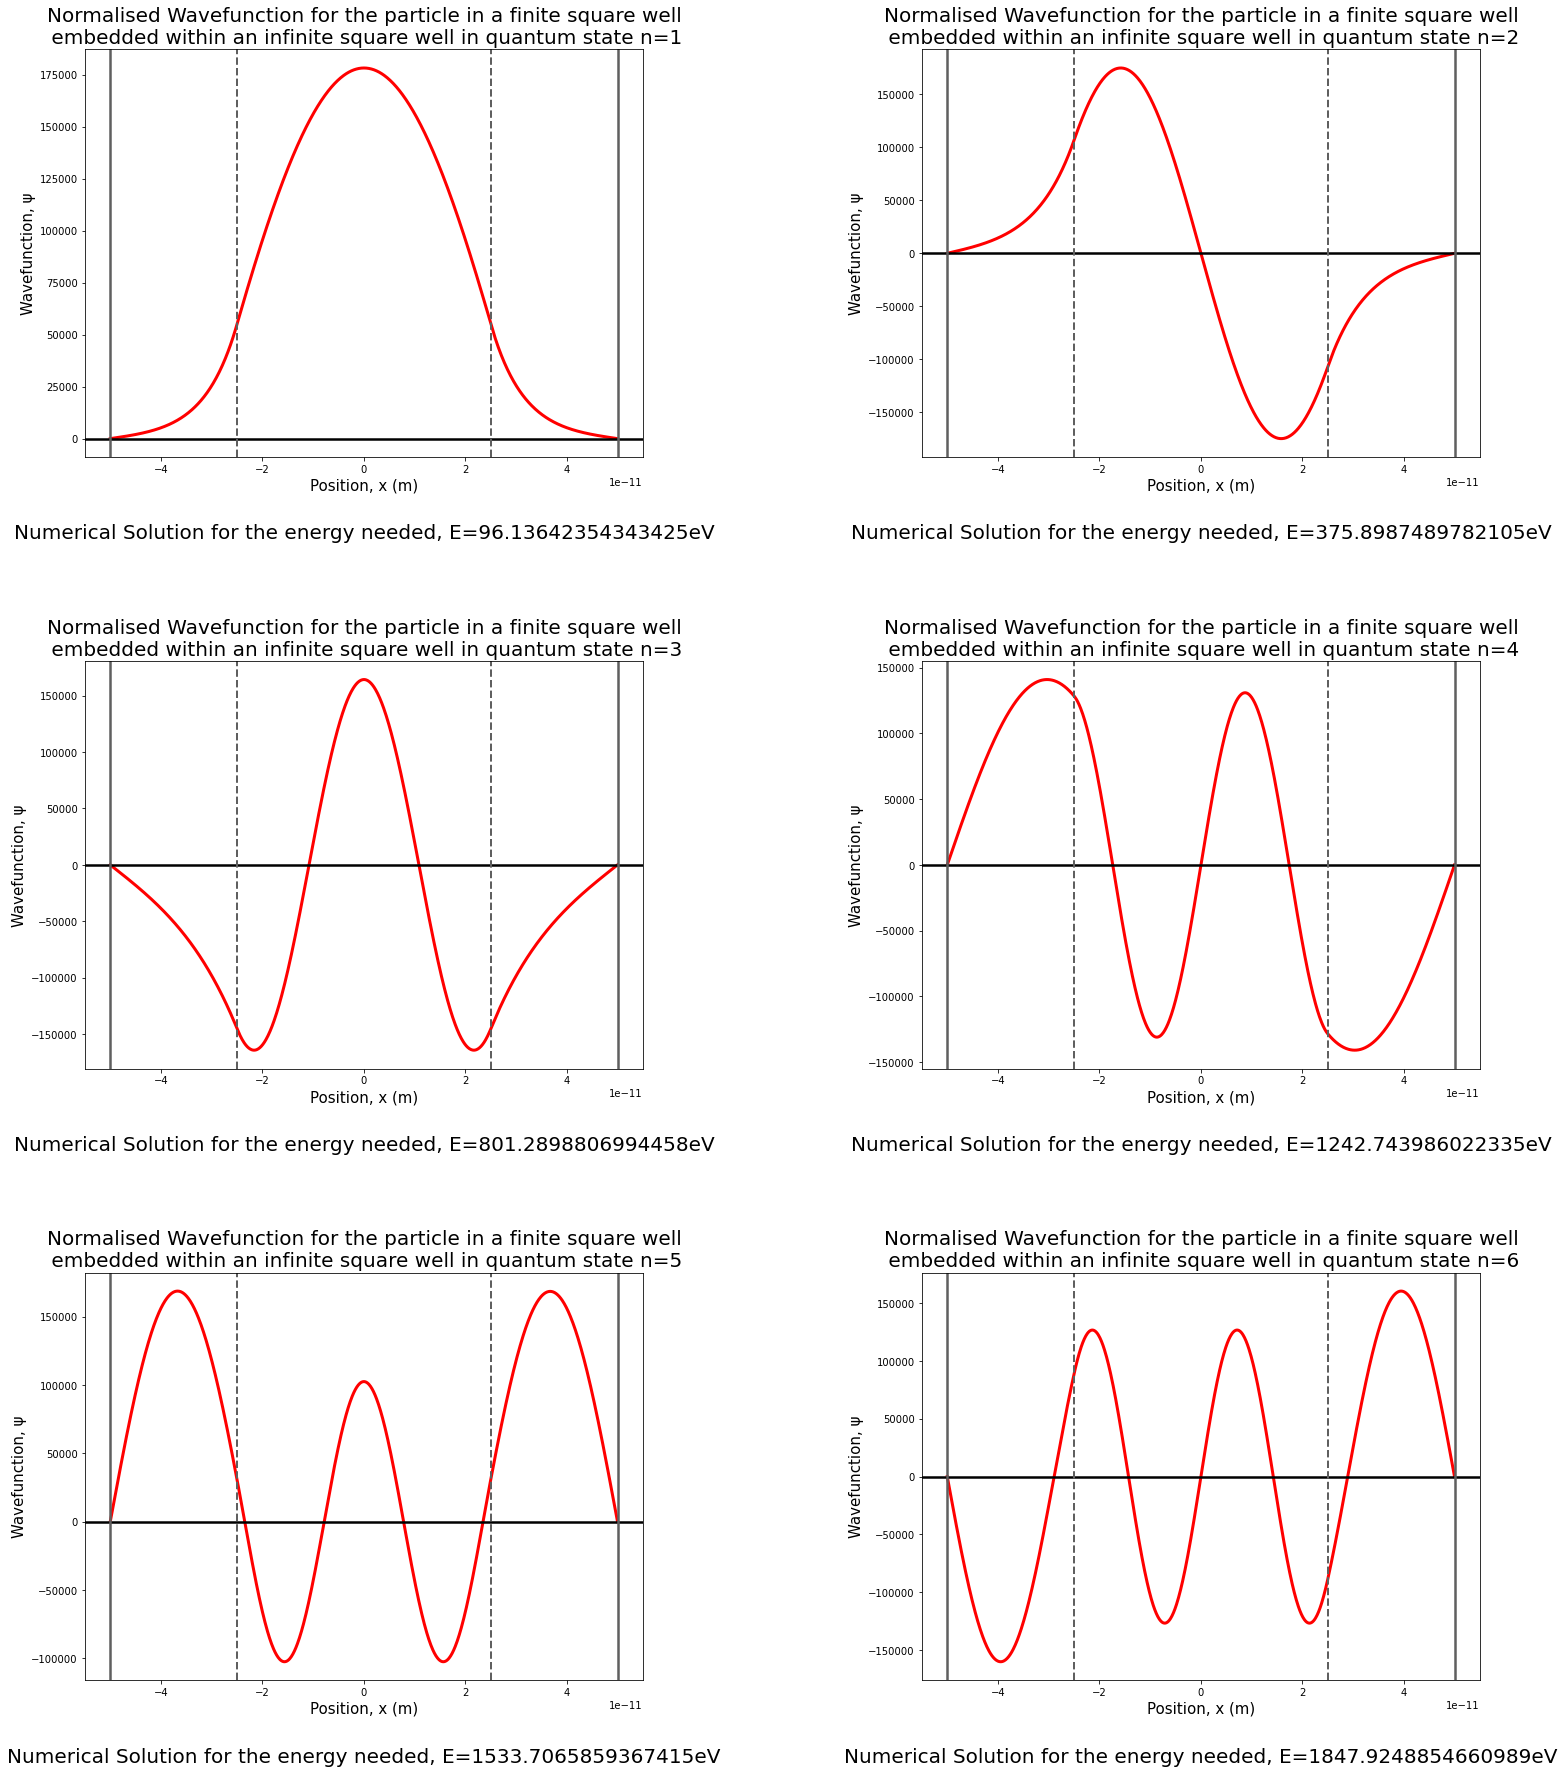

In [25]:
## Code adapted from Section 3.3
# Producing numerical solutions to the finite potential well using the same method as in Section 3.3.
n_array=np.array([1,2,3,4,5,6])
figure1=plt.figure(figsize=(25,30))
index=1
num_energies=[]
for n in n_array: 
    # Initial Conditions
    E1= energyguesses(n,finitepotential)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,finitepotential)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,finitepotential, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,finitepotential, E2)[N] # guesses for energy 
                                                                                            # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,finitepotential, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, finitepotential, E2)[N]
        
    # Converting the energy (J) into eV:
    E_final= E3/e     
    num_energies.append(E_final)
    
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # Correcting any phase shifts that occur in some of the states.
    if n==3 or n==6:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, finitepotential, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, finitepotential, E3)
    
    # Normalising the wavefunction
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index)
    # Plotting the numerical solutions as before.
    ax.plot(xplotpoints,norm_wavefunc,'r',linewidth=3)
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=-a/2,c="#5f5f5f",ls="--",lw=2)
    ax.axvline(x=a/2,c="#5f5f5f",ls="--",lw=2)
    # Labelling the plot.
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in a finite square well\n embedded within an infinite square well in quantum state n={0}".format(n),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.2, "Numerical Solution for the energy needed, E={0}eV".format(E_final), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.5) # Separating the plots by generating space in between them.

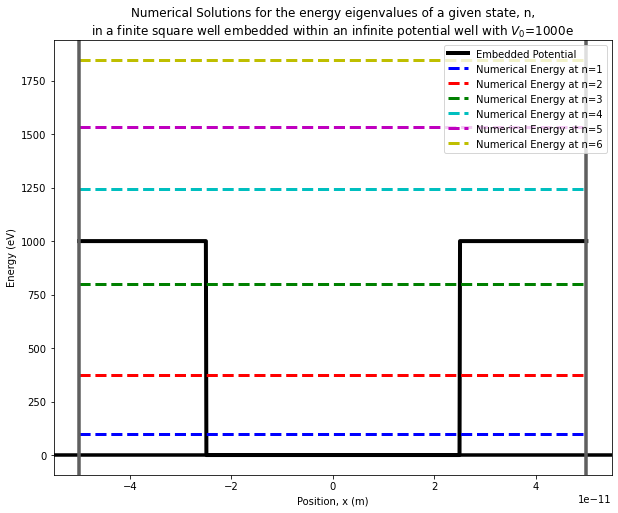

In [26]:
plt.figure(figsize=(10,8))
# Plotting the potential curve
finitepot=[]
for x in xplotpoints:
    finitepot.append(finitepotential(x)/e) 
plt.plot(xplotpoints,finitepot,'k',linewidth=4,label="Embedded Potential")   
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=1.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[0],'b--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[0])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=2.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[1],'r--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[1])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=3.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[2],'g--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[2])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=4.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[3],'c--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[3])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=5.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[4],'m--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[4])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=6.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[5],'y--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[5])) # Numerical energy.

plt.axhline(c="k",ls="-", lw=3.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=3.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=3.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Energy (eV)")
plt.title("Numerical Solutions for the energy eigenvalues of a given state, n,\nin a finite square well embedded within an infinite potential well with $V_0$=1000e");

From the above plots, it can be seen that for a given potential, $V_0=1000e$, which defines the finite square well embedded within the infinite potential well, the numerical wavefunction solutions for the first three states match the known finite potential well solutions as they decay exponentially towards 0 as they pass the boundaries at $x=\frac{a}{2}$ and $x=\frac{-a}{2}$. This is because these states are bound within the finite square well potential, which can be seen by considering these states' numerical energy solutions in the second plot- the plot shows that for $n=1,2,3$, their respective energy eigenvalues all lie below $V_0$. Therefore, as discussed above, as $E<V_0$, we expect the particle to tunnel through the potential; thus, there is a non-zero wavefunction within the potential well and a non-zero probability of finding the particle in the classically forbidden region.

For states higher than $n=3$, we see that they do not decay exponentially within the classically forbidden regions. This is because we can see from the second plot that the energy eigenvalues for $n=4,5,6$ are higher than the value of $V_0$; as a result, as $E>V_0$, these states are not bound within the finite potential well, and so they actually cannot be physical solutions to the finite square well problem. However, as they have sufficient energy to escape the finite potential well, they will now only be acted on by the infinite square well. So the wavefunctions that are displayed are the solutions of those energy states in the infinite square well, as we considered in **Section 3.3**. However, we can see that for these states in the regions $|x|>\frac{a}{2}$, the wavefunction is enlarged and extended; this is because my method is trying to converge to an infinite square well solution- however, the `RungeKutta` function which is being used to calculate the wavefunctions has the `finitepotential` function inputted, therefore, this is causing incorrect wavefunction solutions to be outputted. As a result, my numerical method fails to find the energy states for which $E>V_0$ in this finite potential well embedded within the infinite potential well. 

A possible way to fix this could be to alter my code to consider the potential as `infpotential` for $E>V_0$ and `finitepotential` for $E<V_0$. However, this would be difficult to implement because I would need to use the `finitepotential` function to converge to an energy state using the secant method to then determine whether or not the solution should be calculated using the `infpotential` function; then, I would need to repeat the whole procedure to converge to a solution for an infinite square well for those energy states where $E>V_0$. As you can imagine, this will require a lot of computational power; thus, it is not an efficient way of demonstrating the validity of my numerical solution.

Alternatively, there is another way to illustrate my numerical solutions' validity to the finite potential well. If I increase the value of $V_0$, and make the potential well deeper, this will allow more possible solutions to exist within the finite potential well as there will be more bound states for which $E<V_0$. This is illustrated in the two plots below.

In [27]:
V0=10000*e

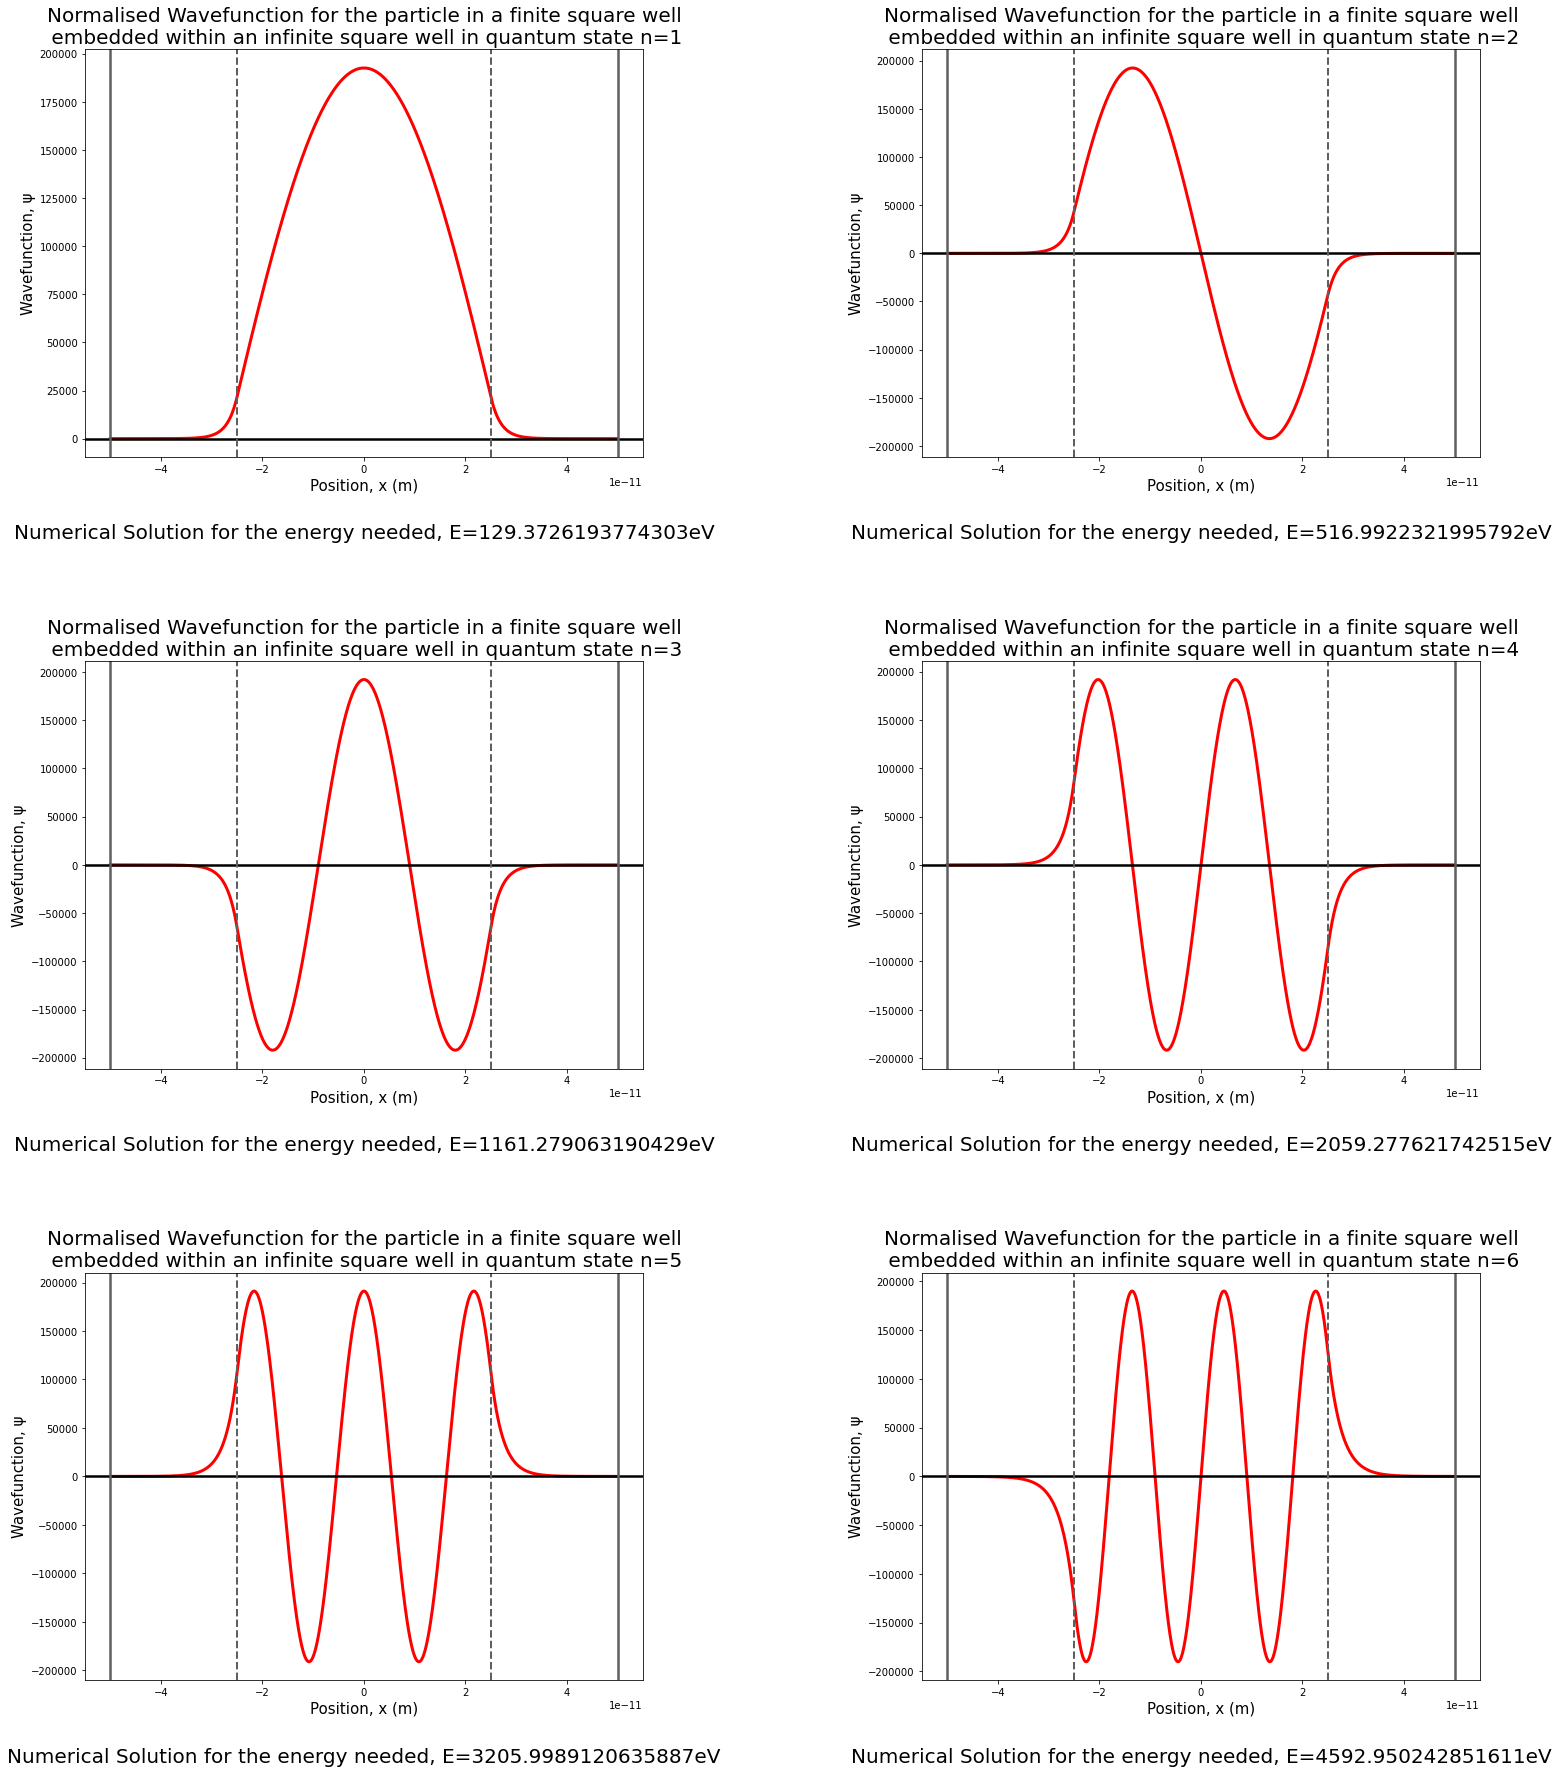

In [28]:
## Code adapted from Section 3.3
# Producing numerical solutions to the finite potential well using the same method as in Section 3.3.
n_array=np.array([1,2,3,4,5,6])
figure1=plt.figure(figsize=(25,30))
index=1
num_energies=[]
for n in n_array: 
    # Initial Conditions
    E1= energyguesses(n,finitepotential)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,finitepotential)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,finitepotential, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,finitepotential, E2)[N] # guesses for energy 
                                                                                            # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,finitepotential, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, finitepotential, E2)[N]
        
    # Converting the energy (J) into eV:
    E_final= E3/e     
    num_energies.append(E_final)
    
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # Correcting any phase shifts that occur in some of the states.
    if n==3 or n==6:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, finitepotential, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, finitepotential, E3)
    
    # Normalising the wavefunction
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index)
    # Plotting the numerical solutions as before.
    ax.plot(xplotpoints,norm_wavefunc,'r',linewidth=3)
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=-a/2,c="#5f5f5f",ls="--",lw=2)
    ax.axvline(x=a/2,c="#5f5f5f",ls="--",lw=2)
    # Labelling the plot.
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in a finite square well\n embedded within an infinite square well in quantum state n={0}".format(n),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.2, "Numerical Solution for the energy needed, E={0}eV".format(E_final), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.5) # Separating the plots by generating space in between them.

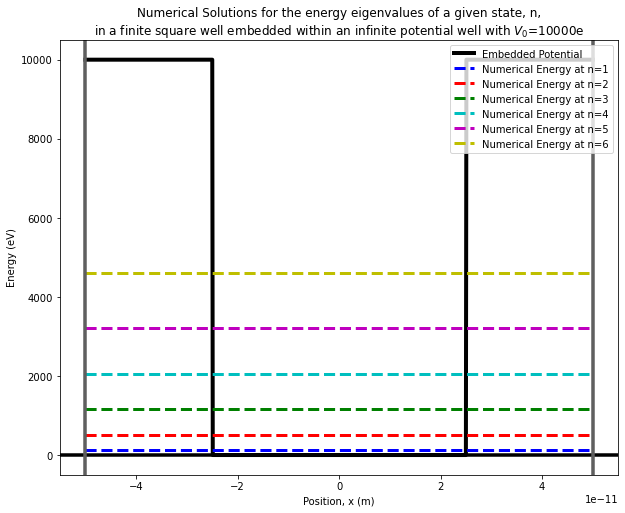

In [29]:
plt.figure(figsize=(10,8))
# Plotting the potential curve
finitepot=[]
for x in xplotpoints:
    finitepot.append(finitepotential(x)/e) 
plt.plot(xplotpoints,finitepot,'k',linewidth=4,label="Embedded Potential")   
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=1.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[0],'b--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[0])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=2.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[1],'r--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[1])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=3.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[2],'g--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[2])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=4.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[3],'c--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[3])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=5.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[4],'m--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[4])) # Numerical energy.
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=6.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[5],'y--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[5])) # Numerical energy.

plt.axhline(c="k",ls="-", lw=3.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=3.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=3.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Energy (eV)")
plt.title("Numerical Solutions for the energy eigenvalues of a given state, n,\nin a finite square well embedded within an infinite potential well with $V_0$=10000e");

As can be seen from the above plots, for a finite potential well with the potential $V_0=10000e$, this results in all of the first six states in consideration having an energy which is less than $V_0$. As a result, due to all of the states being bound state solutions to the finite square well problem, we can see that as we expect, there is an exponential decrease in the numerical wavefunction solution towards 0 as the particle enters the classically forbidden regions. It is also interesting to notice that for the higher energy bound states, the particle penetrates further into the classically forbidden region- for example, by comparing the wavefunctions of $n=1$ and $n=6$ respectively in the region $|x|>\frac{a}{2}$ we can see that the wavefunction for $n=6$ penetrates deeper into the classically forbidden region before going to 0. Furthermore, another thing which is interesting to notice is that the particle wavefunctions seem squished between the bounds of the finite square well- this is because as $V_0$ increases, it becomes more and more like an infinite square well- this will mean that the penetration into the classically forbidden regions will decrease as $V_0\to\infty$ and there will be more bound states and eventually we will retrieve our solutions for the infinite square well as seen in **Section 3.3**. From this, we can also see that by using a finite square well with a deeper potential well, we can also decrease the boundaries of the potential well to confine a particle to an even smaller region which will be of great use in quantum physics research.

### III: My potential

In the final part of this assignment, I will experiment with another embedded potential energy function within the infinite square well potential. This potential energy function does not have an analytical solution to my knowledge, similar to the previous part of this section's finite potential well. The equation defining my potential is defined in equation (26) below:

$$
V(x) = \begin{cases} V_0 & \text{if } x < 0 \\ 
    V_0e^{-x}  & \text{if } x \geq 0, \end{cases}\tag{26}
$$

This will be an interesting case to study as, using the same logic as in the previous case, the wavefunctions will mainly be situated in the $x>0$ region; thus, different quantum tunnelling levels will occur as the energies of the bound states increase.

As before, I will begin by defining the constant $V_0$; I have chosen $V_0=15000e$ to ensure that all of the first six states will be bound states in the potential to avoid the problem resulting from a state having an energy greater than $V_0$ and being unaffected by the embedded potential as described in the previous case. I will then define the potential energy function from equation (26) and then plot the numerical wavefunction solutions to this quantum system along with the energy eigenvalues of each state. 

In [32]:
# Defining the Vexp constant.
Vexp= 15000*e

In [33]:
# Coding a function for the purposes of constant potential going to a decaying potential embedded within the infinite square well.
def exppotential(x): 
    '''
    This function will take in values of x and output a corresponding value for the potential at a given x using
    equation (26) defined in this notebook.
        Inputs: 
            x= position of the particle.
        Output: 
            V= potential energy function at each inputted x value.
    '''
    
    if x<0:
        V=Vexp
    else:
        V=Vexp*np.exp(-x*10**11)
    return V

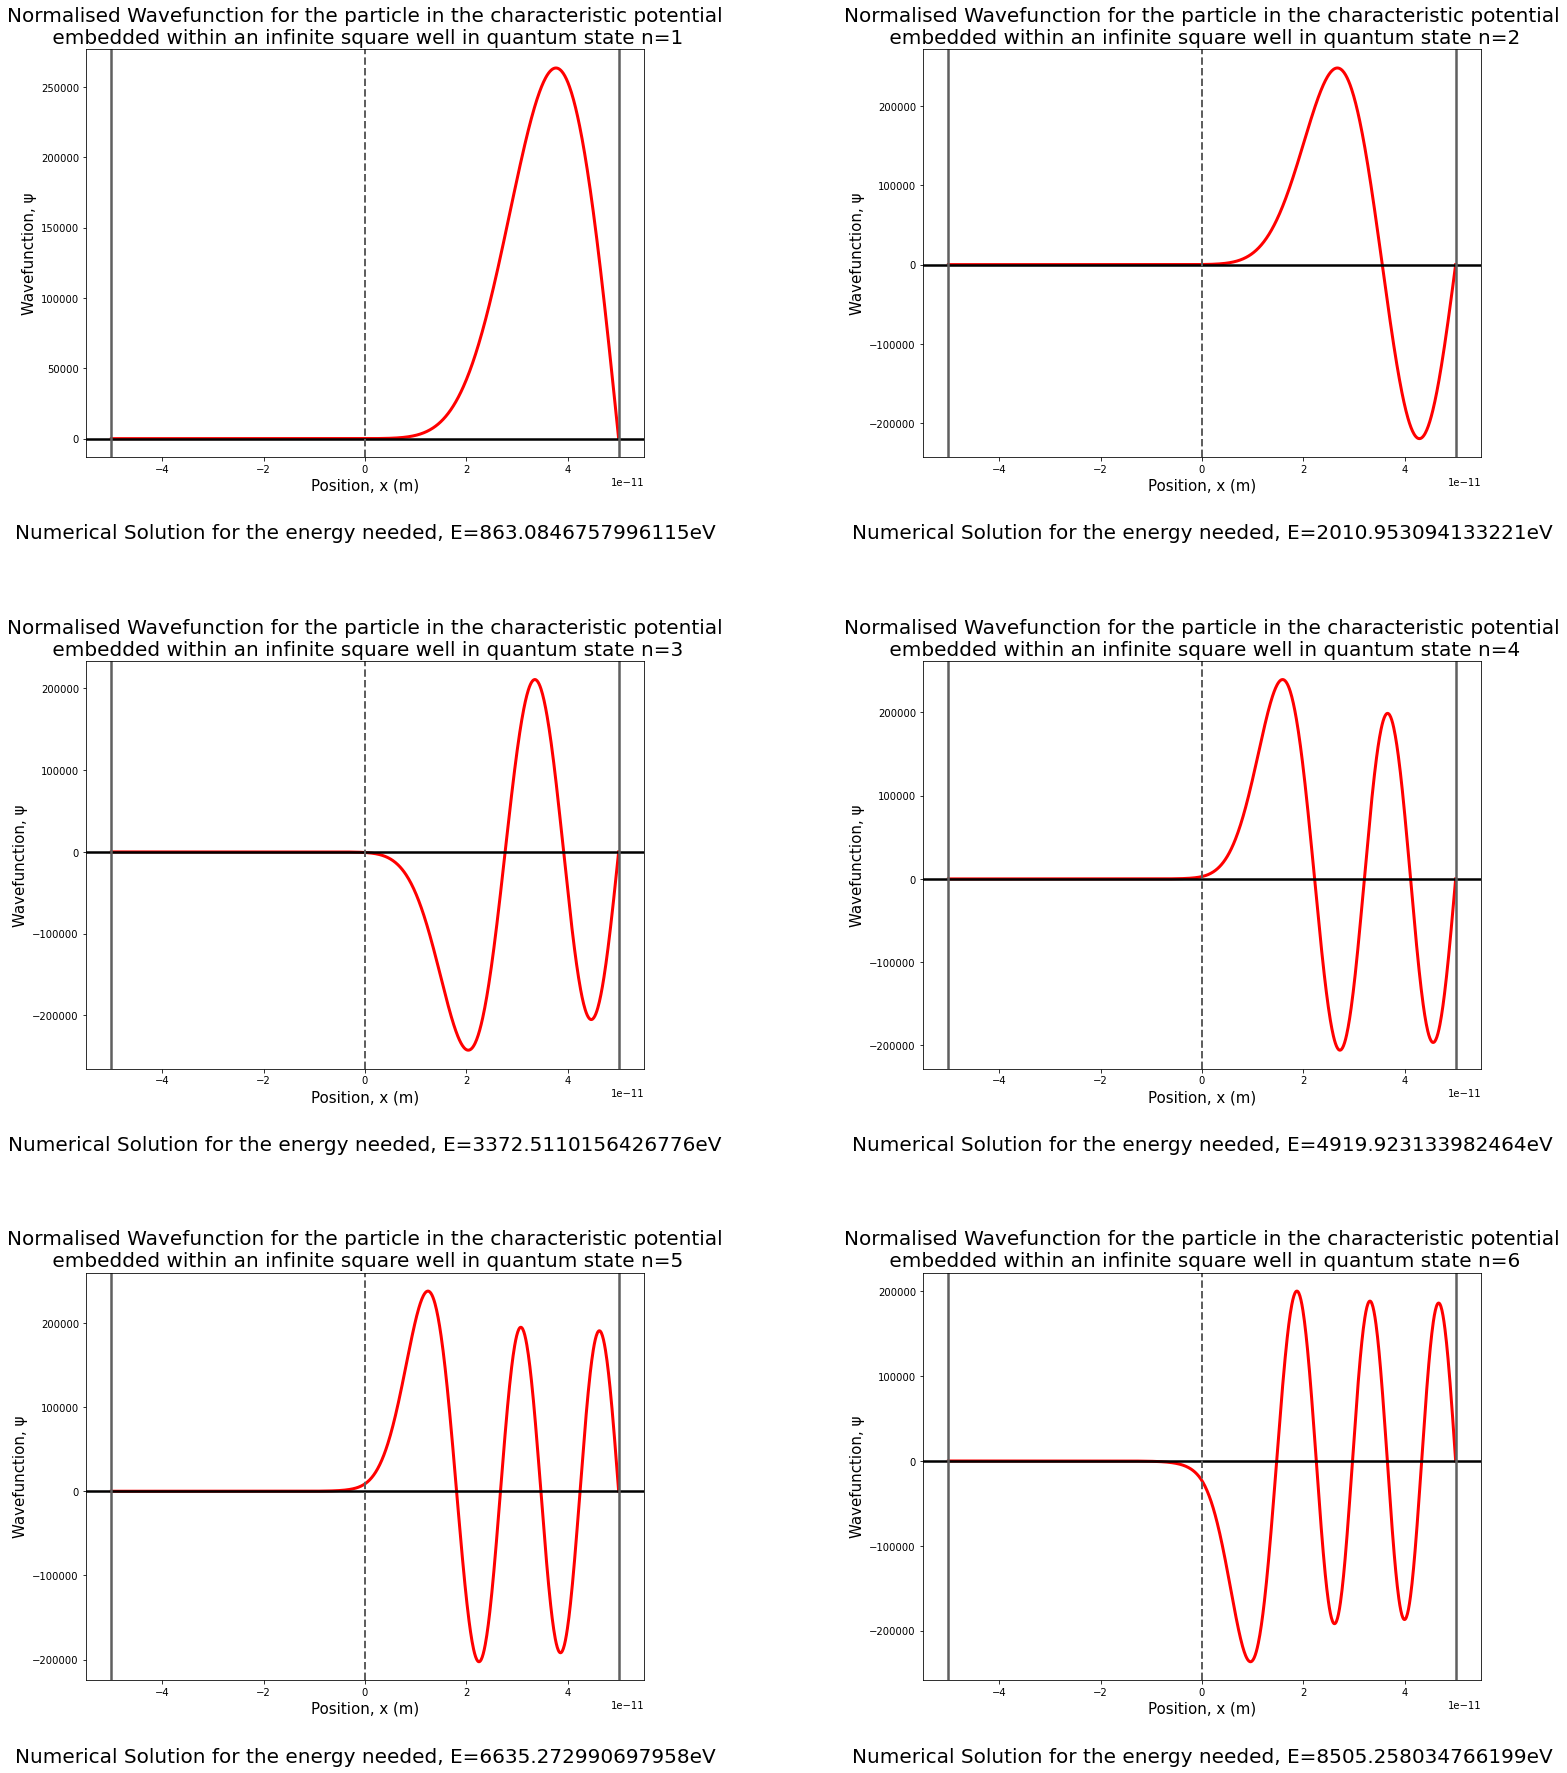

In [34]:
## Code adapted from Section 3.3
# Producing numerical solutions to the constant potential going to a decaying potential embedded within the infinite square well using the same method as in Section 3.3.
n_array=np.array([1,2,3,4,5,6])
figure1=plt.figure(figsize=(25,30))
index=1
num_energies=[]
for n in n_array: 
    # Initial Conditions
    E1= energyguesses(n,exppotential)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,exppotential)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,exppotential, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,exppotential, E2)[N] # guesses for energy 
                                                                                         # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,exppotential, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, exppotential, E2)[N]
        
    # Converting the energy (J) into eV:
    E_final= E3/e     
    num_energies.append(E_final)
    
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # Correcting any phase shifts that occur in some of the states.
    if n==3 or n==6:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, exppotential, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, exppotential, E3)
    
    # Normalising the wavefunction
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index)
    # Plotting the numerical solutions as before.
    ax.plot(xplotpoints,norm_wavefunc,'r',linewidth=3)
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=0,c="#5f5f5f",ls="--",lw=2)
    # Labelling the plot.
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in the characteristic potential\n embedded within an infinite square well in quantum state n={0}".format(n),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.2, "Numerical Solution for the energy needed, E={0}eV".format(E_final), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.5) # Separating the plots by generating space in between them.

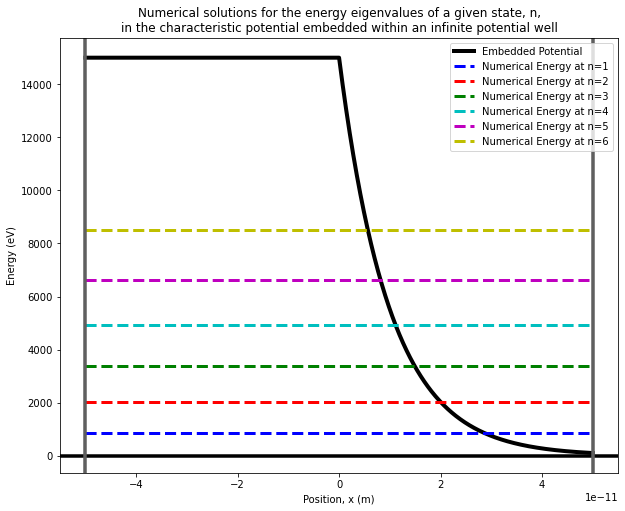

In [36]:
plt.figure(figsize=(10,8))
# Plotting the potential curve
exppot=[]
for x in xplotpoints:
    exppot.append(exppotential(x)/e) 
plt.plot(xplotpoints,exppot,'k',linewidth=4,label="Embedded Potential")   
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=1.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[0],'b--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[0]))
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=2.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[1],'r--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[1]))
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=3.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[2],'g--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[2])) 
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=4.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[3],'c--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[3])) 
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=5.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[4],'m--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[4])) 
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=6.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[5],'y--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[5])) 

plt.axhline(c="k",ls="-", lw=3.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=3.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=3.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Energy (eV)")
plt.title("Numerical solutions for the energy eigenvalues of a given state, n,\nin the characteristic potential embedded within an infinite potential well");

From the above plots, we can notice some interesting characteristics of the bound state wavefunctions of this potential embedded within the infinite potential well. Firstly, it is interesting to see that as $x\to a$, the respective wavefunctions begin to look more like the infinite square well scenario as the exponential potential decrease tends towards 0 and, therefore, we begin to recover a wavefunction which is not as affected by the embedded potential. Additionally, if we consider the case where $x\to 0$ from the positive side, we can see that as the exponential increases towards $V_0$, this causes the wavefunctions to decrease towards 0 exponentially; furthermore, we also see the phenomena of quantum tunnelling in action again as we see that for a higher value of $n$, as the energy eigenvalues increase, this will lead to greater penetration of the wavefunction into the classically forbidden area where $x<0$- for example, considering $n=6$, we can see that there is a greater amount of the wavefunction to the left of the dotted line at $x=0$ when compared to $n=1$.

Another interesting characteristic of the wavefunctions is that for all energy states above $n=1$ the wavefunction's initial oscillation is always greater than the following oscillations as they level off towards a lower amplitude which then stays constant. This is particularly interesting in this scenario as the wavefunctions have a greater amplitude in a region where the embedded potential is higher than the region as $x\to a$ where the potential is lower. This ambiguous property is something that makes this potential very interesting to study further as one would expect that the higher potential would lead to a lower amplitude wavefunction.

Further observations can be made if the potential is changed to have a an exponential decrease of $V_0e^{\frac{-x}{2}}$ as shown in equation (27), this will mean that the potential will exponentially decrease at a lower rate and so we should witness further quantum tunnelling into the $x<0$ region especially from the particles at higher energy states as compared with the scenario above.

$$
V(x) = \begin{cases} V_0 & \text{if } x < 0 \\ 
    V_0e^{\frac{-x}{2}}  & \text{if } x \geq 0, \end{cases}\tag{27}
$$


In [37]:
# Coding a function for the purposes of constant potential going to a decaying potential embedded within the infinite square well.
def exppotential2(x): 
    '''
    This function will take in values of x and output a corresponding value for the potential at a given x using
    equation (27) defined in this notebook.
        Inputs: 
            x= position of the particle.
        Output: 
            V= potential energy function at each inputted x value.
    '''
    
    if x<0:
        V=Vexp
    else:
        V=Vexp*np.exp(-0.5*x*10**11)
    return V

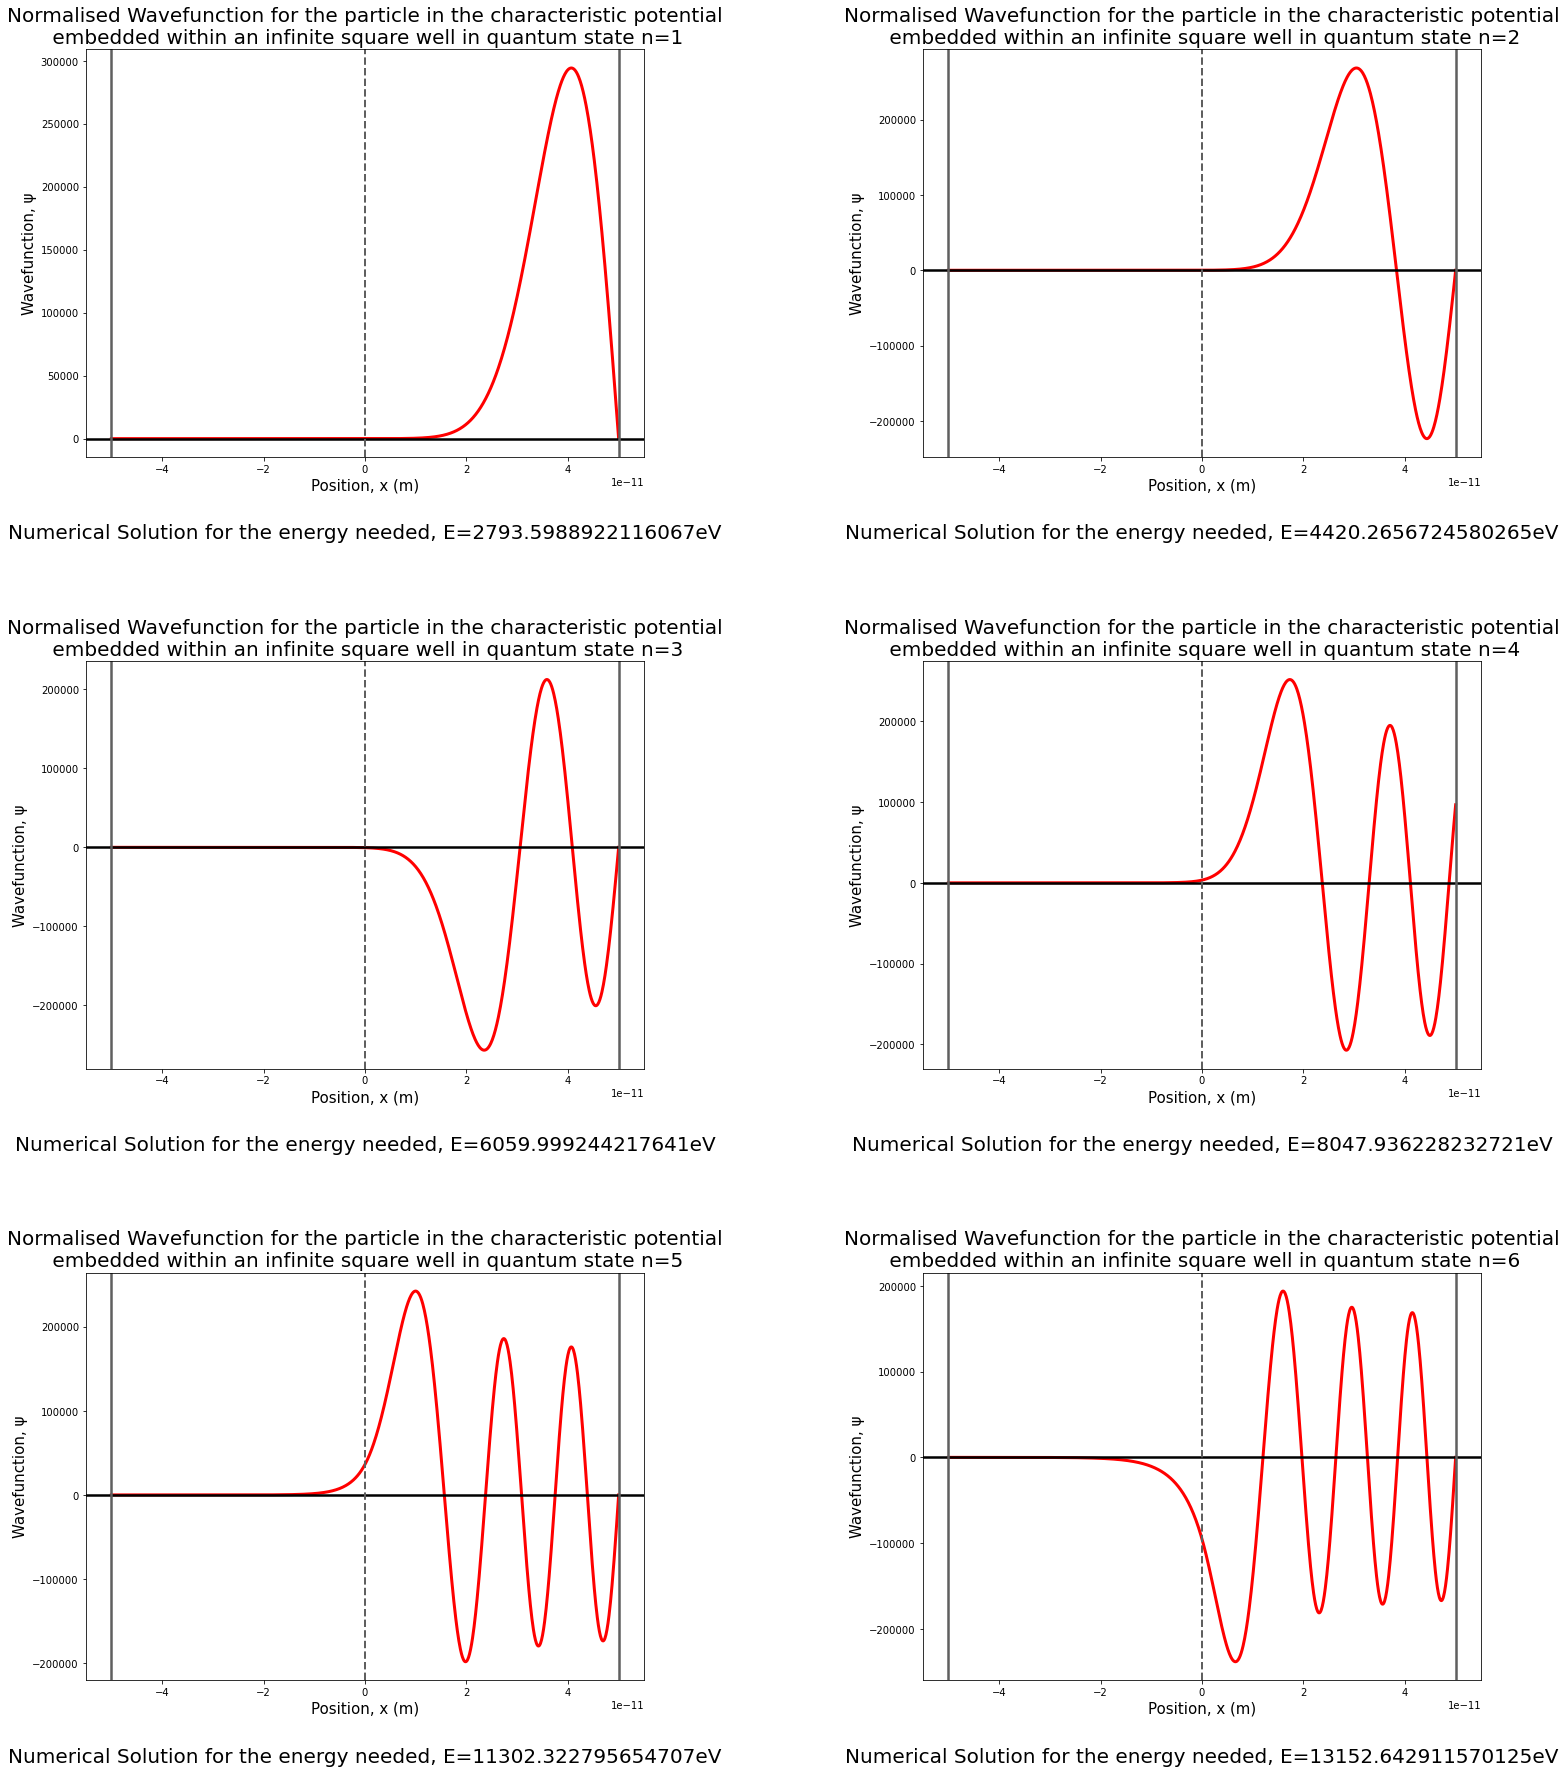

In [38]:
## Code adapted from Section 3.3
# Producing numerical solutions to the constant potential going to a decaying potential embedded within the infinite square well using the same method as in Section 3.3.
n_array=np.array([1,2,3,4,5,6])
figure1=plt.figure(figsize=(25,30))
index=1
num_energies=[]
for n in n_array: 
    # Initial Conditions
    E1= energyguesses(n,exppotential2)[0] # Using the energyguesses function to assign an energy guess to E1. 
    E2= energyguesses(n,exppotential2)[1] # Using the energyguesses function to assign an energy guess to E2. 
    wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,exppotential2, E1)[N] # Using my initial 
    wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,exppotential2, E2)[N] # guesses for energy 
                                                                                         # to create 2 wavefunctions.
    
    # Secant method iteration
    tolerance = e/1e10 # Setting the tolerance for convergence
    while abs(E2-E1) > tolerance: # This loop will keep iterating until the difference in the respective energies are less than the tolerance.
        E3 = E2 - wavefunction2*(E2-E1)/(wavefunction2-wavefunction1)  
        # Updating the initial energies for the next iteration.
        E1 = E2 
        E2 = E3 
        # Re-calculating the wavefunctions for these new energies.
        wavefunction1 = RungeKutta(np.array([0, 1]),xpoints,schrodinger,exppotential2, E1)[N]
        wavefunction2 = RungeKutta(np.array([0, 1]),xpoints,schrodinger, exppotential2, E2)[N]
        
    # Converting the energy (J) into eV:
    E_final= E3/e     
    num_energies.append(E_final)
    
    # Calculating the un-normalised wavfunction using the ground state energy solution calculated in the previous section.
    
    # Correcting any phase shifts that occur in some of the states.
    if n==3 or n==6:
        unnorm_wavefunc = RungeKutta(np.array([0, -1]),xpoints,schrodinger, exppotential2, E3) 
    else:
        unnorm_wavefunc = RungeKutta(np.array([0, 1]),xpoints,schrodinger, exppotential2, E3)
    
    # Normalising the wavefunction
    norm_wavefunc= unnorm_wavefunc/np.sqrt(integration((abs(unnorm_wavefunc))**2 ,step))
    
    # The form of these plots is taken from (matplotlib.org, n.d. a)
    ax=figure1.add_subplot(3,2,index)
    # Plotting the numerical solutions as before.
    ax.plot(xplotpoints,norm_wavefunc,'r',linewidth=3)
    ax.axhline(c="k",ls="-", lw=2.5)   
    ax.axvline(x=-a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=a,c="#5f5f5f",ls="-",lw=2.5)
    ax.axvline(x=0,c="#5f5f5f",ls="--",lw=2)
    # Labelling the plot.
    ax.set_xlabel("Position, x (m)",size=15)
    ax.set_ylabel("Wavefunction, ψ",size=15)
    ax.set_title("Normalised Wavefunction for the particle in the characteristic potential\n embedded within an infinite square well in quantum state n={0}".format(n),size=20);
    
    # The information on how to generate text beneath each plot was found at (Stack Overflow, n.d.) & (matplotlib.org, n.d. b)
    ax.text(0.5,-0.2, "Numerical Solution for the energy needed, E={0}eV".format(E_final), size=20, ha="center", transform=ax.transAxes)
    
    index=index+1 # Increments the index to generate the next plot in the loop.

plt.subplots_adjust(wspace=0.5, hspace=0.5) # Separating the plots by generating space in between them.

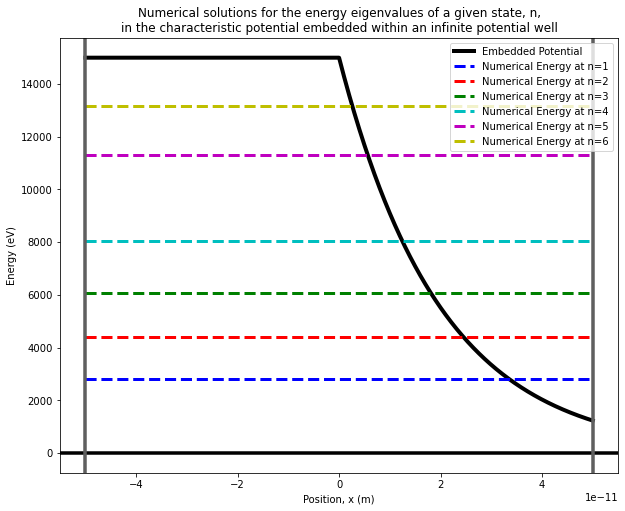

In [39]:
plt.figure(figsize=(10,8))
# Plotting the potential curve
exppot=[]
for x in xplotpoints:
    exppot.append(exppotential2(x)/e) 
plt.plot(xplotpoints,exppot,'k',linewidth=4,label="Embedded Potential")   
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=1.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[0],'b--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[0]))
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=2.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[1],'r--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[1]))
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=3.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[2],'g--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[2])) 
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=4.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[3],'c--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[3])) 
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=5.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[4],'m--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[4])) 
# Plotting the analytical and numerical solutions to the energy eigenvalues for n=6.
plt.plot(xplotpoints,np.ones(len(xplotpoints))*num_energies[5],'y--',linewidth=3,label="Numerical Energy at n={0}".format(n_array[5])) 

plt.axhline(c="k",ls="-", lw=3.5)   
plt.axvline(x=-a,c="#5f5f5f",ls="-",lw=3.5)
plt.axvline(x=a,c="#5f5f5f",ls="-",lw=3.5)
plt.legend(loc='upper right')
plt.xlabel("Position, x (m)")
plt.ylabel("Energy (eV)")
plt.title("Numerical solutions for the energy eigenvalues of a given state, n,\nin the characteristic potential embedded within an infinite potential well");

From the plots above we can see that, as expected, quantum states $n=5$ and $n=6$ have penetrated further into the classically forbidden region due to the decreate in the rate of exponential decrease for $x\geq0$.

## Conclusion

In conclusion, in this notebook, I have developed a numerical method using numerical tools such as the **Runge-Kutta** and the **secant method**, which allowed me to solve for a particle within an infinite square well potential. I then extended this numerical method to enable numerical solutions to be obtained for quantum systems in which there is an embedded potential within the infinite square well scenario. I considered the effects of an embedded harmonic potential, finite square well and finally, my own characteristic potential. Furthermore, I also used the **finite difference method** to motivate the energy guesses used in the secant method to converge to numerical solutions to the energy eigenvalues of a given quantum system. This also made it possible for me to extend my numerical method to provide numerical solutions to the energy eigenvalues and wavefunctions of quantum systems with no analytical solution, such as the finite square well and my characteristic potential. These methods will prove very useful to make predictions for the behaviour of particles within various quantum systems in which a particle is confined within an infinite square well and maybe acted on by an embedded potential within this square well.

I could improve this method by implementing functions that can identify the wavefunction solutions which would be present when the particle has enough energy such that it escapes the finite potential well (or my characteristic potential) and is only acted upon by the infinite potential well; my method thus far only allows me to calculate the wavefunctions for which the particle has an energy which is less than the finite well's potential energy, therefore, this would be a valuable improvement to implement.

With that being said, my code carries out the tasks required with great accuracy; although there is room for improvement, it still serves as a valuable tool to study the effect of different quantum systems acting on a particle.

## Bibliography

* Dash, L. 2021a. "PHAS0029 Final Assignment 2021". \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/course/view.php?id=6766&section=17 \[accessed 9th March 2021\]

* Dash, L. 2021b. "PHAS0029-Session 07-MoreODEs". \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/course/view.php?id=6766&section=17 \[accessed 9th March 2021\]

* Dash, L. 2020. "Supplementary notebook for the Final Assignment". \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/course/view.php?id=6766&section=17 \[accessed 9th March 2021\].

* Rae, Alastair I. M. 2002. "Quantum mechanics". Fourth edition. Bristol: Institute of Physics publishing. 

* Riley, K.F., Hobson, M.P. and Bence, S.J. 2006. Mathematical methods for physics and engineering. Cambridge ; New York: Cambridge University Press.

* 19014831, 2021a. "Using Numerical Methods to solve the equation of motion for a Non-linear Pendulum".\[accessed 6th February 2020\].

* 19014831, 2021b. _"Normal modes of beads connected by strings"_.\[accessed 6th February 2020\].

* GitHub. 2020. scipy/scipy. [online] Available at: https://github.com/scipy/scipy/blob/701ffcc/scipy/special/orthogonal.py#L1117-L1162.

* matplotlib.org. (n.d.)a. matplotlib.figure.Figure — Matplotlib 3.1.0 documentation. [online] Available at: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot [Accessed 1 Apr. 2021].

* matplotlib.org. (n.d.)b. Text properties and layout — Matplotlib 3.4.1 documentation. [online] Available at: https://matplotlib.org/stable/tutorials/text/text_props.html.

* Ph.D, B.O.T. 2019. Finite Difference Solution of the Schrodinger Equation. [online] Medium. Available at: https://medium.com/modern-physics/finite-difference-solution-of-the-schrodinger-equation-c49039d161a8 [Accessed 1 Apr. 2021].

* Schofield, S. 2020. UCL Moodle: Log in to the site. [online] moodle.ucl.ac.uk. Available at: https://moodle.ucl.ac.uk/pluginfile.php/3486461/mod_resource/content/2/PHAS0022-2020-21-Section_4.pdf [Accessed 3 Apr. 2021].

* scipy.github.io. (n.d.). scipy.special.eval_hermite — SciPy v1.7.0.dev0+08390dc Reference Guide. [online] Available at: https://scipy.github.io/devdocs/generated/scipy.special.eval_hermite.html [Accessed 3 Apr. 2021].

* Stack Overflow. (n.d.). python - How to insert the text below subplot in matplotlib? [online] Available at: https://stackoverflow.com/questions/45861947/how-to-insert-the-text-below-subplot-in-matplotlib [Accessed 1 Apr. 2021].

* Zollman, D., Axmann, W., Grabhorn, B., Regehr, C. and Donovan Spring, P. (1994). Visual Quantum Mechanics. [online] perg.phys.ksu.edu. Available at: https://perg.phys.ksu.edu/dvi/vqm/vqm.html.
